# Data Description

There are 81 Variables given house property and the predicted variable is in the last Sales price of the house.


Some numerical variables in the dataset included are -

SalesPrice: This variable represents the sales price of the house

LotArea: This variable represents the size of a lot in square feet

OverallQual: This variable represents rates of the overall material and finish of the house

OverallCond: This variable represents rates of the overall conditions of the house

1stFirSF: This variable represents the first floor in square feet

2ndFirSF: This variable represents the second floor in square feet

BedroomAbvGr: This variable represents bedrooms above grade (does not include basement bedrooms)

YearBuilt: This variable represents the original construction date (this is not technically a numerical variable, but we will use it to produce another variable called Age )
 

 





Some categorical variables are –

MSZoning: This variable identifies the general zoning classification of the sale

LotShape: This variable represents the general shape of the property

Neighborhood: This variable represents physical locations within Ames city limits

CentralAir: This variable represents central air conditioning

SaleCondition: This variable represents condition of sale

MoSold: This variable represents month sold (MM)

YrSold: This variable represents year sold (YYYY)


# Aim

To predict the sale prices of the houses and improve the log error i.e. the error due to the difference between the actual and the predicted home values.




# Approach -

Import and explore the dataset

Exploratory Data Analysis (EDA)

Clean and Preprocess the dataset

Feature Engineering

Data Preparation for model

Model Development

Model Evaluation

Sale Prices of housing on test data

# 1. Import and Explore the data

**Import all the necessary libraries**

In [ ]:
# Install and load the dplyr package for - data manipulation
install.packages('dplyr')
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Install and load the caret package for - machine learning tasks
install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [ ]:
# Install and load the corrplot package for - plot the correlation
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



In [ ]:
# Install and load the caTools package for - data manipulation and analysis. 
install.packages('caTools')
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
# Install and load the glmnet package for - lasso and ridge regression models
install.packages('glmnet')
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [ ]:
# Install and load the glmnet package for - xgboost model
install.packages('xgboost')
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice




In [ ]:
# Install and load the tibble package for - 
install.packages('tibble')
library(tibble)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Install and load the tibble package for - 
install.packages('tidyr')
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘stringr’



Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [ ]:
# Install and load the tibble package for - 
install.packages('ggcorrplot')
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Read the dataset**

In [ ]:
## lets read the training data first,
# Define the path of the file
file_path <- "/content/sample_data/housing_train.csv"

# Read the file using read.csv()
train_data <- read.csv(file_path, header = TRUE, stringsAsFactors = FALSE)

dim(train_data)

[1] 1460   81

In [ ]:
head(train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,⋯,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,⋯,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


# 2. Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics
summary(train_data)

       Id           MSSubClass      MSZoning            LotArea      
 Min.   :   1.0   Min.   : 20.0   Length:1460        Min.   :  1300  
 1st Qu.: 365.8   1st Qu.: 20.0   Class :character   1st Qu.:  7554  
 Median : 730.5   Median : 50.0   Mode  :character   Median :  9478  
 Mean   : 730.5   Mean   : 56.9                      Mean   : 10517  
 3rd Qu.:1095.2   3rd Qu.: 70.0                      3rd Qu.: 11602  
 Max.   :1460.0   Max.   :190.0                      Max.   :215245  
                                                                     
    Street            LotShape         LandContour         Utilities        
 Length:1460        Length:1460        Length:1460        Length:1460       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

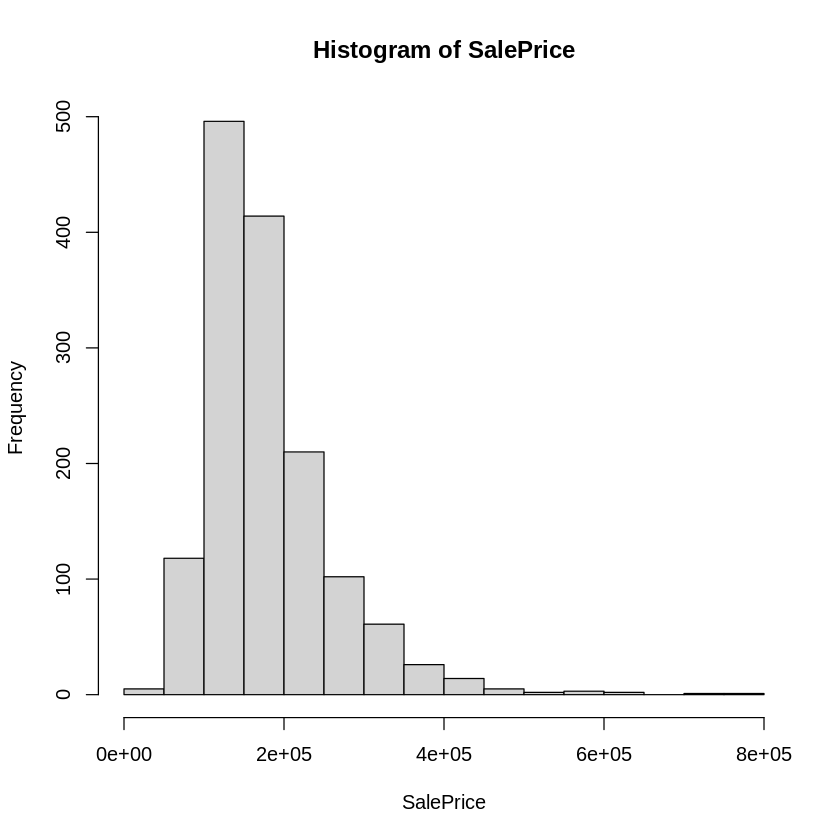

In [ ]:
## lets check our predictive variable i.e SalePrice
# Create a histogram of the SalePrice variable
hist(train_data$SalePrice, main = "Histogram of SalePrice", xlab = "SalePrice")

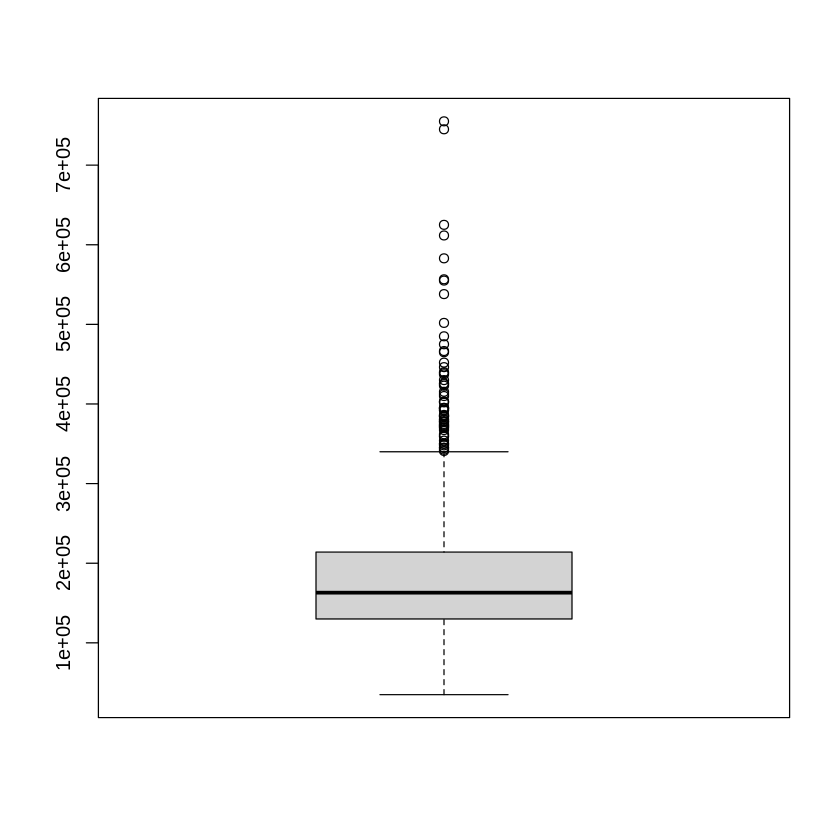

In [ ]:
# Boxplot of SalePrice variable
boxplot(train_data$SalePrice)

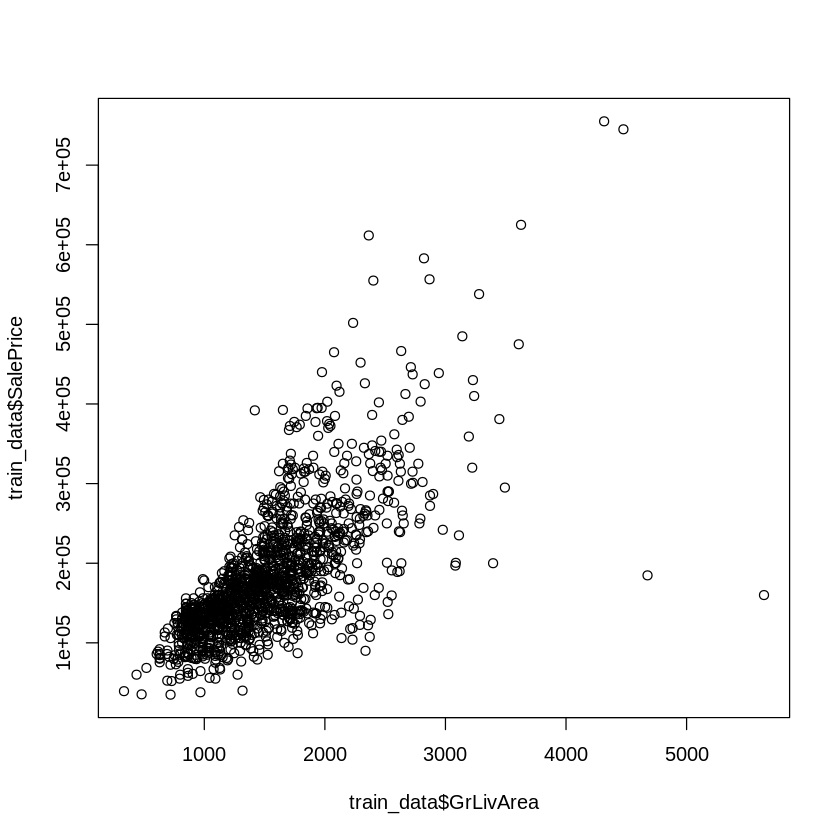

In [ ]:
# Scatterplot of SalePrice vs. GrLivArea variables
plot(train_data$GrLivArea, train_data$SalePrice)

**Lets plot scatterplot to check outliers -**

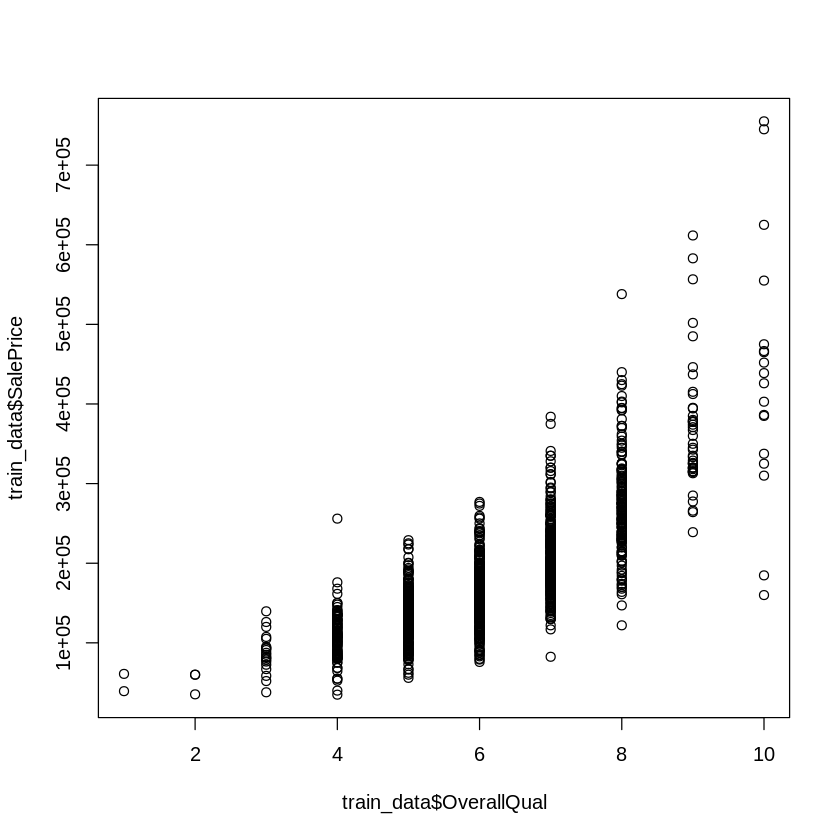

In [ ]:
plot(train_data$OverallQual, train_data$SalePrice)

# 3. Clean and Preprocess the dataset

In [ ]:
# Check for missing values -train
nulls_train = colSums(is.na(train_data))
print(nulls_train)

           Id    MSSubClass      MSZoning       LotArea        Street 
            0             0             0             0             0 
     LotShape   LandContour     Utilities     LotConfig     LandSlope 
            0             0             0             0             0 
 Neighborhood    Condition1    Condition2      BldgType    HouseStyle 
            0             0             0             0             0 
  OverallQual   OverallCond     YearBuilt  YearRemodAdd     RoofStyle 
            0             0             0             0             0 
     RoofMatl   Exterior1st   Exterior2nd    MasVnrType    MasVnrArea 
            0             0             0             8             8 
    ExterQual     ExterCond    Foundation      BsmtQual      BsmtCond 
            0             0             0            37            37 
 BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2    BsmtFinSF2 
           38            37             0            38             0 
    Bs

In [ ]:
#removing columns with NA values more than 10% of the data
set.seed(123)
colMeans(is.na(train_data)) > .10
train_data <- train_data[, colMeans(is.na(train_data)) <= .10]
dim(train_data)



Id    MSSubClass      MSZoning       LotArea        Street 
        FALSE         FALSE         FALSE         FALSE         FALSE 
     LotShape   LandContour     Utilities     LotConfig     LandSlope 
        FALSE         FALSE         FALSE         FALSE         FALSE 
 Neighborhood    Condition1    Condition2      BldgType    HouseStyle 
        FALSE         FALSE         FALSE         FALSE         FALSE 
  OverallQual   OverallCond     YearBuilt  YearRemodAdd     RoofStyle 
        FALSE         FALSE         FALSE         FALSE         FALSE 
     RoofMatl   Exterior1st   Exterior2nd    MasVnrType    MasVnrArea 
        FALSE         FALSE         FALSE         FALSE         FALSE 
    ExterQual     ExterCond    Foundation      BsmtQual      BsmtCond 
        FALSE         FALSE         FALSE         FALSE         FALSE 
 BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2    BsmtFinSF2 
        FALSE         FALSE         FALSE         FALSE         FALSE 
    BsmtUnfSF   TotalBsmtSF       Heating     HeatingQC    CentralAir 
        FALSE         FALSE         FALSE         FALSE         FALSE 
   Electrical     X1stFlrSF     X2ndFlrSF  LowQualFinSF     GrLivArea 
        FALSE         FALSE         FALSE         FALSE         FALSE 
 BsmtFullBath  BsmtHalfBath      FullBath      HalfBath  BedroomAbvGr 
        FALSE         FALSE         FALSE         FALSE         FALSE 
 KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Functional    Fireplaces 
        FALSE         FALSE         FALSE         FALSE         FALSE 
   GarageType   GarageYrBlt  GarageFinish    GarageCars    GarageArea 
        FALSE         FALSE         FALSE         FALSE         FALSE 
   GarageQual    GarageCond    PavedDrive    WoodDeckSF   OpenPorchSF 
        FALSE         FALSE         FALSE         FALSE         FALSE 
EnclosedPorch    X3SsnPorch   ScreenPorch      PoolArea       MiscVal 
        FALSE         FALSE         FALSE         FALSE         FALSE 
       MoSold        YrSold      SaleType SaleCondition     SalePrice 
        FALSE         FALSE         FALSE         FALSE         FALSE

[1] 1460   75

In [ ]:
#replace NA values of numerical column with mean of column and categorical column with mode of column
for (col in names(train_data)) {
  if (is.numeric(train_data[[col]])) {
    train_data[[col]] <- ifelse(is.na(train_data[[col]]), mean(train_data[[col]], na.rm = TRUE), train_data[[col]])
  } else {
    train_data[[col]] <- ifelse(is.na(train_data[[col]]), mode(train_data[[col]]), train_data[[col]])
  }
}

In [ ]:
# Check for null values column-wise
new_nulls = colSums(is.na(train_data))
print(new_nulls)
dim(train_data)
train_data <- as.data.frame(train_data)

           Id    MSSubClass      MSZoning       LotArea        Street 
            0             0             0             0             0 
     LotShape   LandContour     Utilities     LotConfig     LandSlope 
            0             0             0             0             0 
 Neighborhood    Condition1    Condition2      BldgType    HouseStyle 
            0             0             0             0             0 
  OverallQual   OverallCond     YearBuilt  YearRemodAdd     RoofStyle 
            0             0             0             0             0 
     RoofMatl   Exterior1st   Exterior2nd    MasVnrType    MasVnrArea 
            0             0             0             0             0 
    ExterQual     ExterCond    Foundation      BsmtQual      BsmtCond 
            0             0             0             0             0 
 BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2    BsmtFinSF2 
            0             0             0             0             0 
    Bs

[1] 1460   75

In [ ]:
# Check for duplicates
duplicated_rows <- duplicated(train_data)

# Count the number of duplicates
sum(duplicated_rows)


[1] 0

In [ ]:
dim(train_data)

[1] 1460   75

Outlier Removal

In [ ]:
# Select the numerical columns in the dataset
num_cols <- sapply(train_data, is.numeric)
num_df <- train_data[, num_cols]
dim(num_df)


[1] 1460   37

In [ ]:
# Define a threshold for outlier detection (e.g., 3 standard deviations from the mean)
outlier_threshold <- 4.5

# Identify outlier rows in numerical columns

z_scores <- apply(num_df, 2, function(x) abs(scale(x, center = TRUE, scale = TRUE)))
outlier_rows_num <- apply(z_scores, 1, function(x) any(x > outlier_threshold))

In [ ]:
# Identify outlier rows in categorical columns
cat_cols <- sapply(train_data, is.factor)
cat_df <- train_data[, cat_cols]
outlier_rows_cat <- apply(cat_df, 1, function(x) any(x == ""))

# Combine outlier rows from both numerical and categorical columns
outlier_rows <- outlier_rows_num | outlier_rows_cat

In [ ]:
# Print the number of detected outliers for each column type
cat("Number of outliers detected:\n")
cat(sprintf("Total: %d\n", sum(outlier_rows)))

Number of outliers detected:
Total: 118


In [ ]:
# Remove the outlier rows from the dataset
train_data_clean <- train_data[!outlier_rows,]

In [ ]:
dim(train_data_clean)

[1] 1342   75

# 4. Feature Engineering

In [ ]:
train_data <- data.matrix(train_data_clean)
dim(train_data)
head(train_data)

[1] 1342   75

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,⋯,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,1,60,4,8450,2,4,4,1,5,1,⋯,0,0,0,0,0,2,2008,9,5,208500
2,2,20,4,9600,2,4,4,1,3,1,⋯,0,0,0,0,0,5,2007,9,5,181500
3,3,60,4,11250,2,1,4,1,5,1,⋯,0,0,0,0,0,9,2008,9,5,223500
4,4,70,4,9550,2,1,4,1,1,1,⋯,272,0,0,0,0,2,2006,9,1,140000
5,5,60,4,14260,2,1,4,1,3,1,⋯,0,0,0,0,0,12,2008,9,5,250000
7,7,20,4,10084,2,4,4,1,5,1,⋯,0,0,0,0,0,8,2007,9,5,307000


In [ ]:
cor_matrix <- cor(train_data)
cor_matrix

Warning message in cor(train_data):
“the standard deviation is zero”


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,⋯,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.0000000000,0.021131974,-0.012091590,-0.0039626361,-0.0008665558,0.03845485,-0.020931833,0.0137837040,0.0505108805,0.0194981813,⋯,0.003141411,-0.013784932,0.004292728,NA,-0.042226100,2.296932e-02,-0.007514590,0.033395779,-0.014071176,-0.03198603
MSSubClass,0.0211319742,1.000000000,0.025386655,-0.3012631080,0.0098096477,0.12225524,0.013505119,-0.0237923830,0.0875207777,-0.0304664246,⋯,-0.018934711,0.017467654,-0.032728502,NA,-0.059739976,-1.220941e-02,-0.012650946,0.006220147,-0.030566281,-0.08329371
MSZoning,-0.0120915902,0.025386655,1.000000000,-0.0718418186,0.0996038413,0.06231885,-0.019519104,-0.0012247485,-0.0113015541,-0.0287883968,⋯,0.131312733,-0.001869190,0.011002188,NA,0.002315254,-2.458082e-02,-0.020580851,0.093034382,-0.016994287,-0.20512654
LotArea,-0.0039626361,-0.301263108,-0.071841819,1.0000000000,-0.0847090033,-0.24052060,-0.095542950,0.0261548093,-0.1716298222,0.2339773212,⋯,-0.027848046,0.051833119,0.121192098,NA,0.020826960,-1.801618e-02,-0.008879022,0.013096217,0.054944062,0.36430177
Street,-0.0008665558,0.009809648,0.099603841,-0.0847090033,1.0000000000,-0.02725570,0.107584146,0.0016699555,-0.0061421980,-0.1341398146,⋯,0.022407039,0.002548657,-0.057032303,NA,-0.046033019,1.178791e-02,-0.026801702,0.028254570,0.010092309,0.05631943
LotShape,0.0384548486,0.122255240,0.062318852,-0.2405205987,-0.0272557035,1.00000000,0.066936841,-0.0385538727,0.2123064887,-0.0818855473,⋯,0.087703346,-0.016150620,-0.028328489,NA,0.000132915,-2.246604e-02,0.028189890,0.009448701,-0.033966292,-0.24239938
LandContour,-0.0209318327,0.013505119,-0.019519104,-0.0955429498,0.1075841463,0.06693684,1.000000000,0.0082024622,-0.0391409522,-0.3706307049,⋯,-0.057818757,-0.019492355,-0.027773640,NA,0.031779210,-6.266053e-03,0.004453342,-0.048241483,0.040863996,0.03215923
Utilities,0.0137837040,-0.023792383,-0.001224748,0.0261548093,0.0016699555,-0.03855387,0.008202462,1.0000000000,-0.0345054672,-0.0059719636,⋯,-0.010005776,-0.001138093,0.137367782,NA,-0.003999908,-5.388383e-02,0.024326225,-0.132252676,-0.095301835,-0.01478193
LotConfig,0.0505108805,0.087520778,-0.011301554,-0.1716298222,-0.0061421980,0.21230649,-0.039140952,-0.0345054672,1.0000000000,0.0041341751,⋯,-0.058790577,-0.015614180,-0.003428135,NA,-0.009121347,2.034097e-02,-0.002705915,0.015068995,0.033831471,-0.05295771
LandSlope,0.0194981813,-0.030466425,-0.028788397,0.2339773212,-0.1341398146,-0.08188555,-0.370630705,-0.0059719636,0.0041341751,1.0000000000,⋯,0.006351909,0.165841060,0.074744252,NA,-0.013298628,-8.151919e-03,-0.010804398,0.052592482,-0.068739971,0.02069844


In [ ]:
## find the correlation between the variables and drop based on condition
d2 <- train_data %>% 
  as.matrix %>%
  cor %>%
  as.data.frame %>%
  rownames_to_column(var = 'var1') %>%
  gather(var2, value, -var1)
d2

to_remove <- filter(d2, ((value > 0.8 | value < -0.8) & (var1 != var2)))
print(to_remove)

Warning message in cor(.):
“the standard deviation is zero”


var1,var2,value
<chr>,<chr>,<dbl>
Id,Id,1.0000000000
MSSubClass,Id,0.0211319742
MSZoning,Id,-0.0120915902
LotArea,Id,-0.0039626361
Street,Id,-0.0008665558
LotShape,Id,0.0384548486
LandContour,Id,-0.0209318327
Utilities,Id,0.0137837040
LotConfig,Id,0.0505108805


           var1         var2     value
1     SalePrice  OverallQual 0.8046159
2   Exterior2nd  Exterior1st 0.8579642
3   Exterior1st  Exterior2nd 0.8579642
4  TotRmsAbvGrd    GrLivArea 0.8294307
5     GrLivArea TotRmsAbvGrd 0.8294307
6    GarageArea   GarageCars 0.8840734
7    GarageCars   GarageArea 0.8840734
8    GarageCond   GarageQual 0.9015974
9    GarageQual   GarageCond 0.9015974
10  OverallQual    SalePrice 0.8046159


In [ ]:
# based on high correlation I have choosen following five columns to drop
#train_data <- train_data[ , !(colnames(train_data) %in% c('Exterior1st','GarageArea','Exterior2nd','TotRmsAbvGrd','X1stFlrSF'))]
#dim(train_data)

In [ ]:
# based on high correlation I have choosen following eight columns to drop
train_data <- train_data[ , !(colnames(train_data) %in% c('Exterior1st','GarageArea','GrLivArea','Exterior2nd','TotRmsAbvGrd','GarageCars','GarageCond','GarageQual'))]
dim(train_data)

[1] 1342   67

In [ ]:
# lets see  the correlation matrix again
corr_matrix <- cor(train_data)

# Print the correlation matrix
print(corr_matrix)

Warning message in cor(train_data):
“the standard deviation is zero”


                         Id   MSSubClass     MSZoning       LotArea
Id             1.0000000000  0.021131974 -0.012091590 -0.0039626361
MSSubClass     0.0211319742  1.000000000  0.025386655 -0.3012631080
MSZoning      -0.0120915902  0.025386655  1.000000000 -0.0718418186
LotArea       -0.0039626361 -0.301263108 -0.071841819  1.0000000000
Street        -0.0008665558  0.009809648  0.099603841 -0.0847090033
LotShape       0.0384548486  0.122255240  0.062318852 -0.2405205987
LandContour   -0.0209318327  0.013505119 -0.019519104 -0.0955429498
Utilities      0.0137837040 -0.023792383 -0.001224748  0.0261548093
LotConfig      0.0505108805  0.087520778 -0.011301554 -0.1716298222
LandSlope      0.0194981813 -0.030466425 -0.028788397  0.2339773212
Neighborhood   0.0011743217 -0.028280797 -0.251783738  0.0535547760
Condition1    -0.0168584873 -0.013523423 -0.026470559  0.0633824516
Condition2    -0.0018328527 -0.076540718  0.021618421  0.0009483548
BldgType       0.0219311460  0.757944260  0.0047

#5. Data Preparation for model

In [ ]:
# Remove the ID column
train_data <- train_data[, !(colnames(train_data) == "Id")]

head(train_data)
dim(train_data)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,60,4,8450,2,4,4,1,5,1,6,⋯,0,0,0,0,0,2,2008,9,5,208500
2,20,4,9600,2,4,4,1,3,1,25,⋯,0,0,0,0,0,5,2007,9,5,181500
3,60,4,11250,2,1,4,1,5,1,6,⋯,0,0,0,0,0,9,2008,9,5,223500
4,70,4,9550,2,1,4,1,1,1,7,⋯,272,0,0,0,0,2,2006,9,1,140000
5,60,4,14260,2,1,4,1,3,1,14,⋯,0,0,0,0,0,12,2008,9,5,250000
7,20,4,10084,2,4,4,1,5,1,21,⋯,0,0,0,0,0,8,2007,9,5,307000


[1] 1342   66

In [ ]:
str(train_data)

 num [1:1342, 1:66] 60 20 60 70 60 20 60 50 190 20 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:1342] "1" "2" "3" "4" ...
  ..$ : chr [1:66] "MSSubClass" "MSZoning" "LotArea" "Street" ...


# 6. Model Development

**Split the dataset into train and validation**

In [ ]:
train_data <- data.frame(train_data)

In [ ]:
# Split the data into training and validation sets
set.seed(123)
sample <- sample(c(TRUE, FALSE), nrow(train_data), 
                  replace=TRUE, prob=c(0.7,0.3))

train  <- train_data[sample, ]
validation   <- train_data[!sample, ]

In [ ]:
dim(train)
dim(validation)

[1] 947  66

[1] 395  66

In [ ]:
head(train)
head(validation)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,60,4,8450,2,4,4,1,5,1,6,⋯,0,0,0,0,0,2,2008,9,5,208500
3,60,4,11250,2,1,4,1,5,1,6,⋯,0,0,0,0,0,9,2008,9,5,223500
7,20,4,10084,2,4,4,1,5,1,21,⋯,0,0,0,0,0,8,2007,9,5,307000
8,60,4,10382,2,1,4,1,1,1,17,⋯,228,0,0,0,350,11,2009,9,5,200000
10,190,4,7420,2,4,4,1,1,1,4,⋯,0,0,0,0,0,1,2008,9,5,118000
11,20,4,11200,2,4,4,1,5,1,19,⋯,0,0,0,0,0,2,2008,9,5,129500


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,20,4,9600,2,4,4,1,3,1,25,⋯,0,0,0,0,0,5,2007,9,5,181500
4,70,4,9550,2,1,4,1,1,1,7,⋯,272,0,0,0,0,2,2006,9,1,140000
5,60,4,14260,2,1,4,1,3,1,14,⋯,0,0,0,0,0,12,2008,9,5,250000
9,50,5,6120,2,4,4,1,5,1,18,⋯,205,0,0,0,0,4,2008,9,1,129900
12,60,4,11924,2,1,4,1,5,1,16,⋯,0,0,0,0,0,7,2006,7,6,345000
17,20,4,11241,2,1,4,1,2,1,13,⋯,0,0,0,0,700,3,2010,9,5,149000


# 7. Lets Fit Predict and generate resuts on different models

# i. Linear Regression


**Fit the Model on train data**

In [ ]:
fit.lm <- lm(formula = SalePrice ~ ., data = train)

**Prediction on validation**

In [ ]:
pred.lm <- predict(fit.lm, newdata = validation)

In [ ]:
actuals_preds.lm <- data.frame(cbind(actuals=validation$SalePrice, predicteds=pred.lm))
head(actuals_preds.lm)

,actuals,predicteds
,<dbl>,<dbl>
2,181500,191934.1
4,140000,149478.5
5,250000,281785.4
9,129900,119230.7
12,345000,359626.2
17,149000,150994.6


**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_lm <- sqrt(mean((pred.lm - validation$SalePrice)^2))
print(rmse_lm)

[1] 24053.13


In [ ]:
# Accuracy 
accuracy_lm <- cor(actuals_preds.lm, validation$SalePrice)^2
print(paste("Accuracy on validation set:", round(accuracy_lm * 100, 2), "%"))

[1] "Accuracy on validation set: 100 %"   "Accuracy on validation set: 88.72 %"


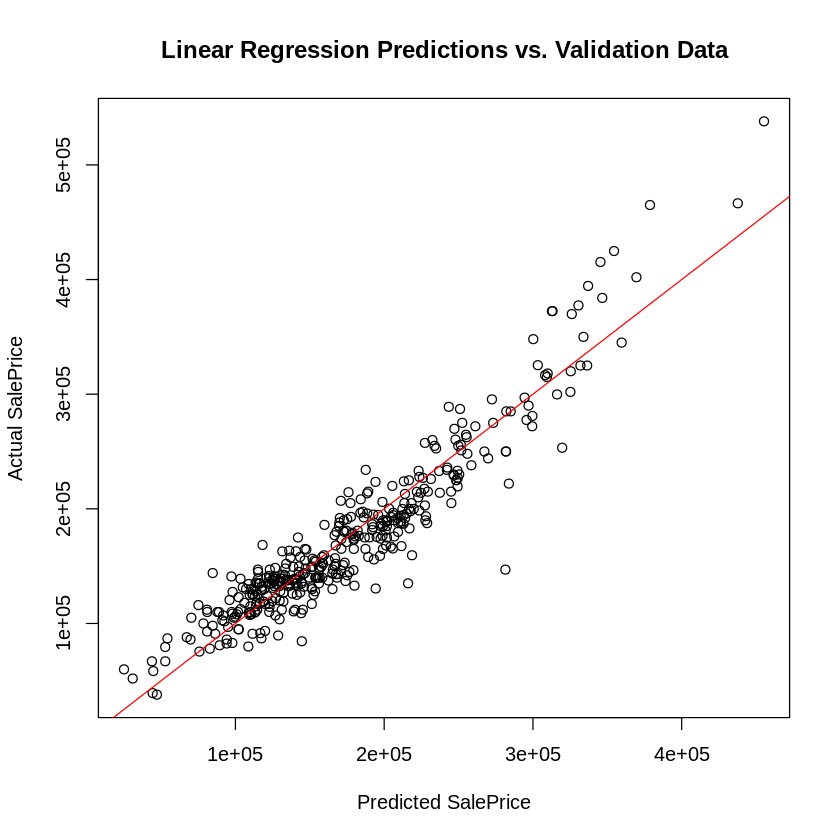

In [ ]:
# plot the graph 
plot(pred.lm, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                      main = "Linear Regression Predictions vs. Validation Data")
abline(0, 1, col = "red")

# ii. Elastic Net

**Fit the Model on train data**

In [ ]:
set.seed(42)
cv_5 = trainControl(method = "cv", number = 5)

fit.elnet = train(SalePrice ~ ., data = train, method = "glmnet", trControl = cv_5)
summary(fit.elnet)

            Length Class      Mode     
a0            76   -none-     numeric  
beta        4940   dgCMatrix  S4       
df            76   -none-     numeric  
dim            2   -none-     numeric  
lambda        76   -none-     numeric  
dev.ratio     76   -none-     numeric  
nulldev        1   -none-     numeric  
npasses        1   -none-     numeric  
jerr           1   -none-     numeric  
offset         1   -none-     logical  
call           5   -none-     call     
nobs           1   -none-     numeric  
lambdaOpt      1   -none-     numeric  
xNames        65   -none-     character
problemType    1   -none-     character
tuneValue      2   data.frame list     
obsLevels      1   -none-     logical  
param          0   -none-     list     

**Prediction on validation** 

In [ ]:
pred.elnet <- predict(fit.elnet, newdata = validation)
#pred.elnet

In [ ]:
actuals_preds.elnet <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.elnet))
head(actuals_preds.elnet)

,actuals,predicteds
,<dbl>,<dbl>
2,181500,193182.8
4,140000,153161.1
5,250000,279579.6
9,129900,125978.1
12,345000,358902.5
17,149000,151665.0


**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_elnet <- sqrt(mean((pred.elnet - validation$SalePrice)^2))
print(rmse_elnet)

[1] 23780.52


In [ ]:
# Accuracy 
accuracy_elnet <- cor(actuals_preds.elnet, validation$SalePrice)^2
print(paste("Accuracy on validation set:", round(accuracy_elnet * 100, 2), "%"))

[1] "Accuracy on validation set: 100 %"  "Accuracy on validation set: 88.9 %"


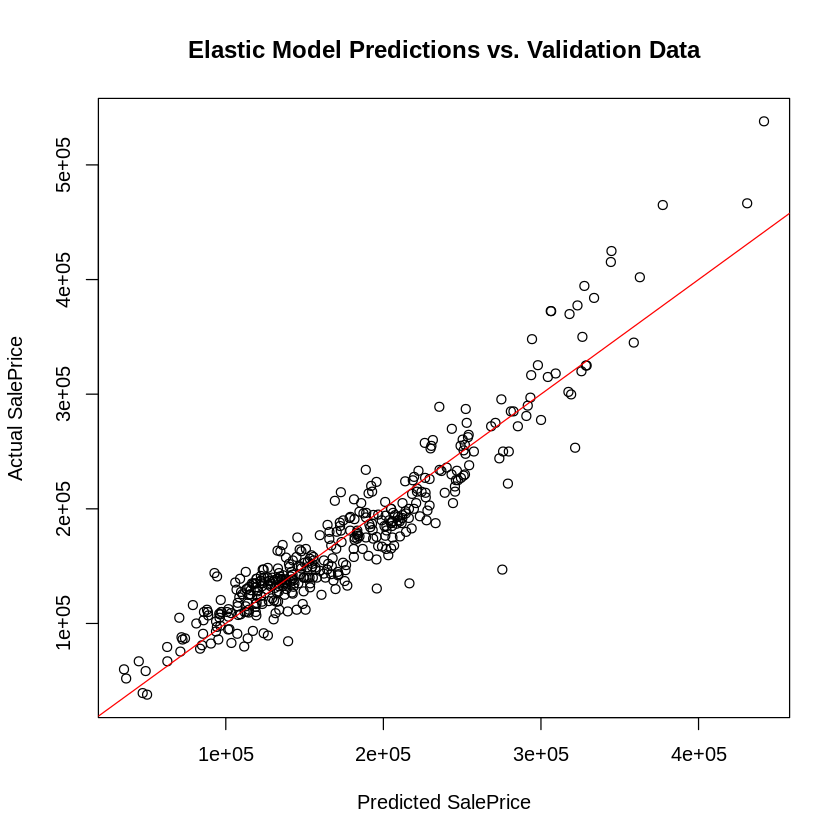

In [ ]:
# plot the graph 
plot(pred.elnet, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                      main = "Elastic Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# iii. Lasso Regression

**Fit the Model on train data**

In [ ]:
# Fit the lasso regression model
fit.lasso <- glmnet(x = model.matrix(SalePrice ~ ., data = train), 
                    y = train$SalePrice, 
                    alpha = 1, # Lasso regression
                    lambda = 0.1) # Value of lambda


**Prediction on validation**

In [ ]:
# Predict on the test set
pred.lasso <- predict(fit.lasso, newx = model.matrix(SalePrice ~ ., data = validation))

In [ ]:
lasso_actuals_preds <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.lasso))
head(lasso_actuals_preds)

,actuals,s0
,<dbl>,<dbl>
2,181500,191937.1
4,140000,149222.0
5,250000,281798.5
9,129900,119353.1
12,345000,359677.2
17,149000,151032.8


**Performance metrics**




In [ ]:
# Calculate the RMSE
rmse_lasso <- sqrt(mean((pred.lasso - validation$SalePrice)^2))
print(rmse_lasso)

[1] 24056.04


In [ ]:
# Accuracy 
accuracy_lasso <- cor(lasso_actuals_preds, validation$SalePrice)^2
print(paste("Accuracy on validation set:", round(accuracy_lasso * 100, 2), "%"))

[1] "Accuracy on validation set: 100 %"   "Accuracy on validation set: 88.72 %"


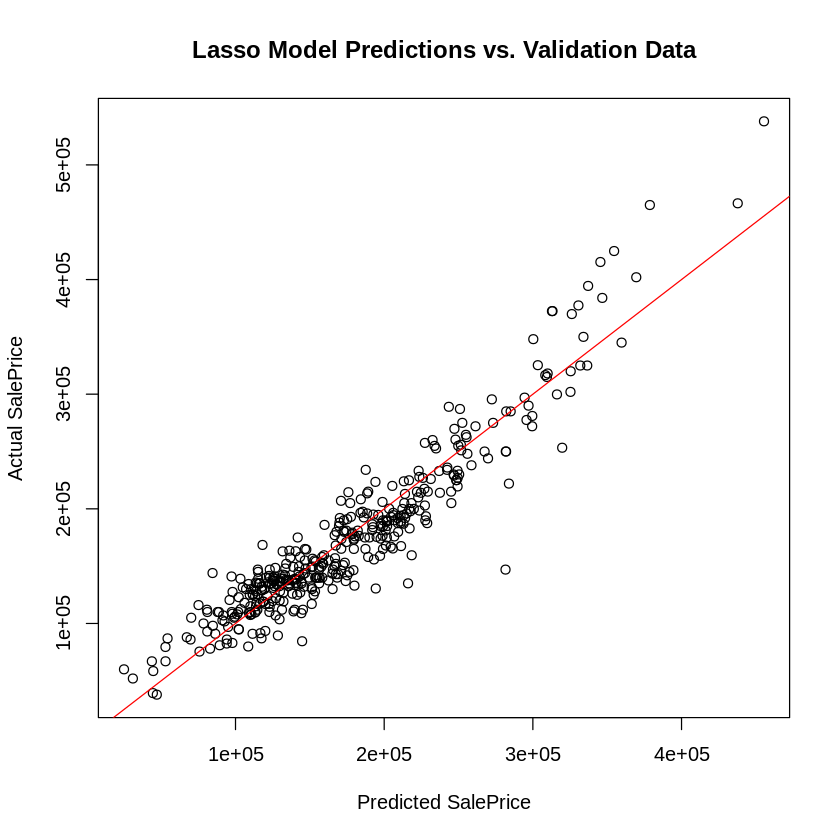

In [ ]:
# plot the graph 
plot(pred.lasso, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                      main = "Lasso Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# iv. Ridge Regression

**Fit the Model on train data**

In [ ]:
# Fit the ridge regression model
fit.ridge <- glmnet(x = model.matrix(SalePrice ~ ., data = train), 
                    y = train$SalePrice, 
                    alpha = 0, # Ridge regression
                    lambda = 0.1) # Value of lambda

**Prediction on validation** 

In [ ]:
# Predict on the test set
pred.ridge <- predict(fit.ridge, newx = model.matrix(SalePrice ~ ., data = validation))

In [ ]:
ridge_actuals_preds <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.ridge))
head(ridge_actuals_preds)

,actuals,s0
,<dbl>,<dbl>
2,181500,191936.6
4,140000,149219.1
5,250000,281799.0
9,129900,119352.5
12,345000,359677.7
17,149000,151033.4


**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_ridge <- sqrt(mean((pred.ridge - validation$SalePrice)^2))
print(rmse_ridge)

[1] 24056.22


In [ ]:
# Accuracy 
accuracy_ridge <- cor(ridge_actuals_preds, validation$SalePrice)^2
print(paste("Accuracy on validation set:", round(accuracy_ridge * 100, 2), "%"))

[1] "Accuracy on validation set: 100 %"   "Accuracy on validation set: 88.72 %"


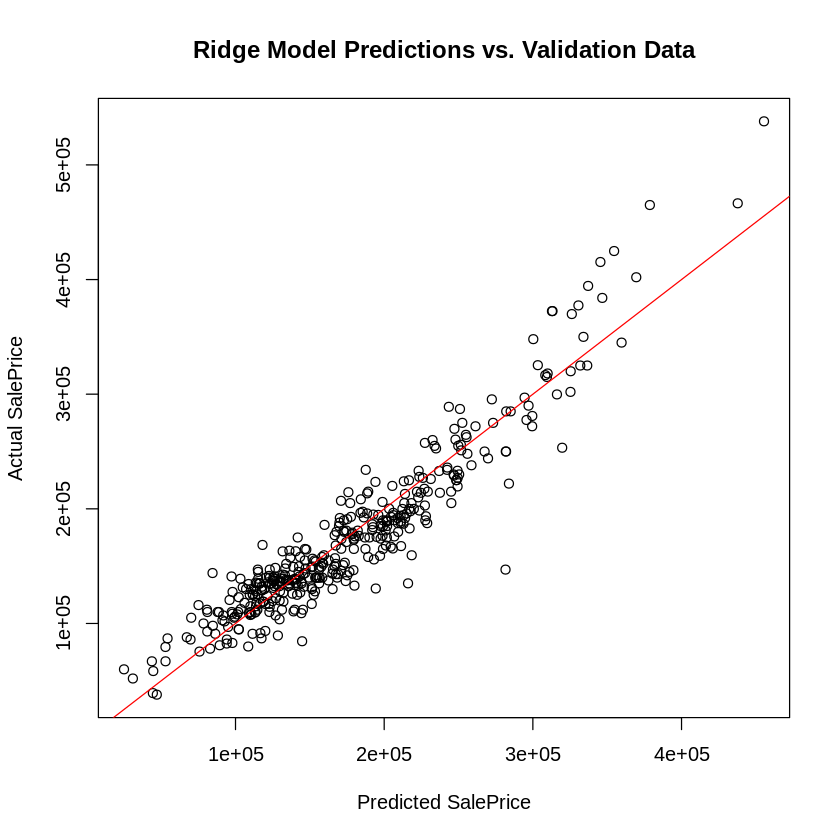

In [ ]:
# plot the graph 

plot(pred.ridge, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                      main = "Ridge Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# v. Decision Tree

**Fit the Model on train data**

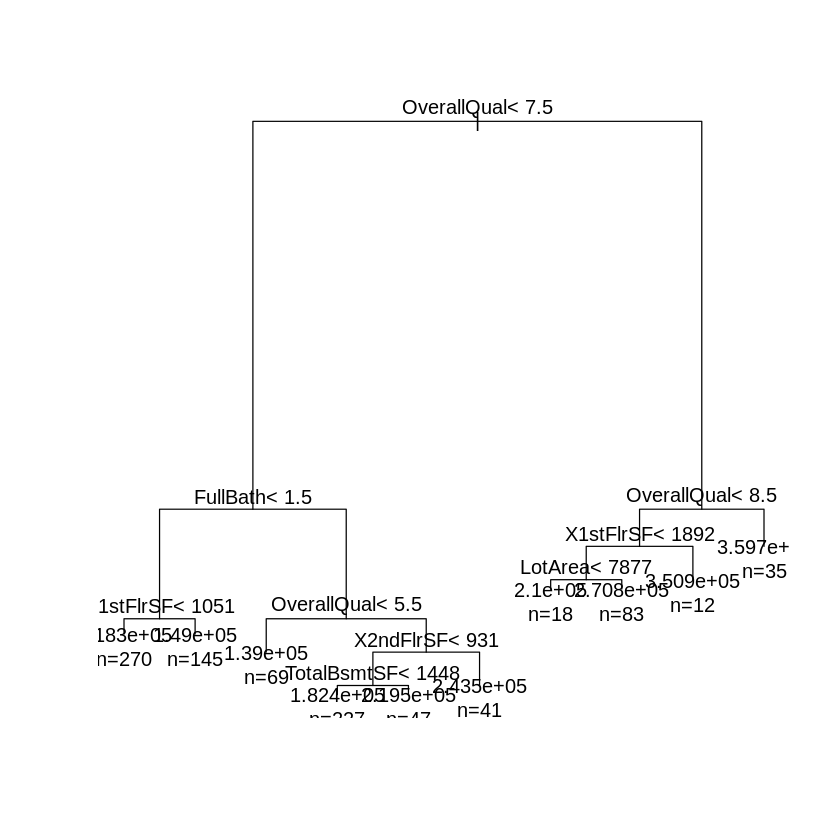

In [ ]:
library(rpart)
fit.dectree <- rpart(SalePrice ~ ., data = train)
plot(fit.dectree)
text(fit.dectree, use.n = TRUE)

**Prediction on validation** 

In [ ]:
#pred.dectree <- predict(fit.dectree, newx = model.matrix(SalePrice ~ ., data = validation))
pred.dectree <- predict(fit.dectree, newdata = validation)

In [ ]:
dectree_actuals_preds <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.dectree))
head(dectree_actuals_preds)

,actuals,predicteds
,<dbl>,<dbl>
2,181500,182403.3
4,140000,118284.1
5,250000,270808.9
9,129900,182403.3
12,345000,359694.7
17,149000,118284.1


**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_dectree <- sqrt(mean((pred.dectree - validation$SalePrice)^2))
print(rmse_dectree)

[1] 39350.39


In [ ]:
# Accuracy 
accuracy_dectree <- cor(pred.dectree, validation$SalePrice)^2
print(paste("Accuracy on test set:", round(accuracy_dectree * 100, 2), "%"))

[1] "Accuracy on test set: 69.56 %"


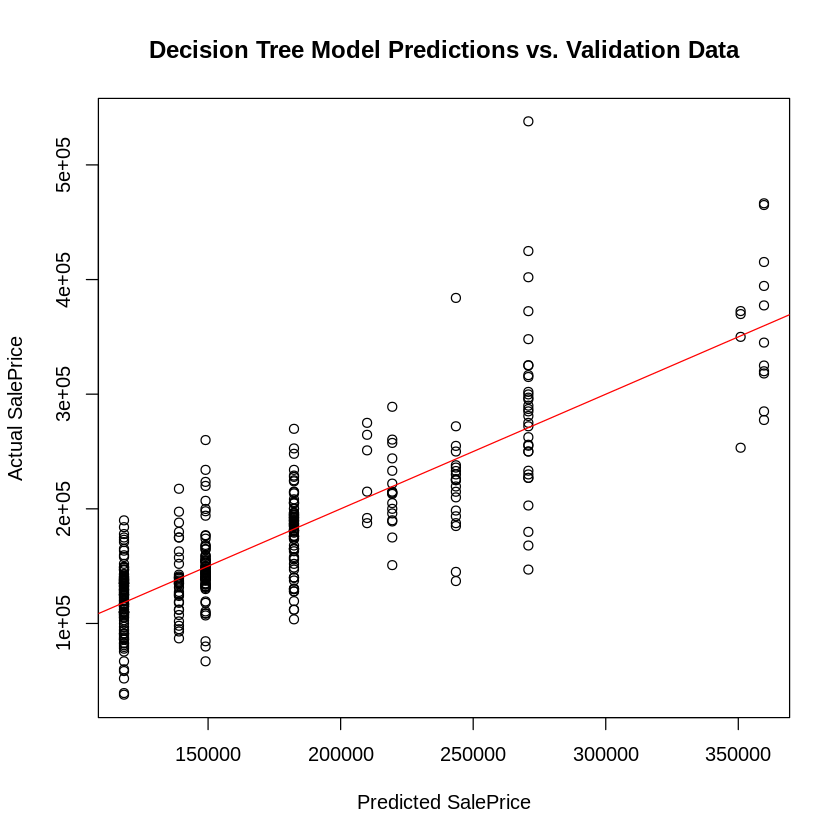

In [ ]:
plot(pred.dectree, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                         main = "Decision Tree Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# vi. Random Forest

**Fit the Model on train data**

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("randomForest"):
“installation of package ‘randomForest’ had non-zero exit status”


ERROR: ignored

In [ ]:
fit.rf <- randomForest(SalePrice ~ ., data = train)
print(fit.rf)

**Prediction on validation** 

In [ ]:
pred.rf <- predict(fit.rf, newdata = validation)

In [ ]:
rf_actuals_preds <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.rf))
head(rf_actuals_preds)

**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_rf <- sqrt(mean((pred.rf - validation$SalePrice)^2))
print(rmse_rf)

In [ ]:
# Accuracy 
accuracy_rf <- cor(pred.rf, validation$SalePrice)^2
print(paste("Accuracy on test set:", round(accuracy_rf * 100, 2), "%"))

In [ ]:
plot(pred.rf, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                    main = "Decision Tree Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# vii. Gradient Boost


**Fit the Model on train data**

In [ ]:
install.packages("gbm")
library(gbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Define hyperparameters to tune
gbm_grid <- expand.grid(
  n.trees = seq(50, 200, 50),
  interaction.depth = c(3, 5, 7),
  shrinkage = c(0.01, 0.1, 0.2),
  n.minobsinnode = c(5, 10, 20)
)

In [ ]:
# Train model using grid search
gbm_model <- train(
  x = as.matrix(train[, -ncol(train)]),
  y = train$SalePrice,
  method = "gbm",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = gbm_grid,
  metric = "RMSE"
)

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4986072748.2625            -nan     0.0100 65530818.2452
     2 4922036061.3060            -nan     0.0100 63908527.0288
     3 4859948013.9122            -nan     0.0100 61536214.9654
     4 4802789223.1690            -nan     0.0100 53896749.8519
     5 4740837301.1464            -nan     0.0100 54881462.2138
     6 4680316626.1225            -nan     0.0100 57490443.4756
     7 4620685537.1219            -nan     0.0100 48125540.5727
     8 4562756440.0447            -nan     0.0100 59698302.1929
     9 4506660298.8703            -nan     0.0100 46990540.3569
    10 4456013492.3746            -nan     0.0100 53281421.0793
    20 3955952871.2838            -nan     0.0100 47983870.3685
    40 3163997185.8053            -nan     0.0100 32451443.1995
    60 2579970254.7209            -nan     0.0100 24604159.9081
    80 2152163937.6259            -nan     0.0100 18757790.4089
   100 1814486267.8012            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4982478059.3759            -nan     0.0100 63698146.9097
     2 4916352098.0221            -nan     0.0100 60742576.4548
     3 4853382931.2372            -nan     0.0100 60136547.0506
     4 4794111203.8778            -nan     0.0100 67097374.5183
     5 4728226731.2592            -nan     0.0100 60779701.8812
     6 4665754100.1506            -nan     0.0100 60126429.0334
     7 4608399776.3705            -nan     0.0100 55705568.5784
     8 4552403029.7759            -nan     0.0100 51112558.1339
     9 4499876363.4926            -nan     0.0100 52935854.9524
    10 4443814661.6035            -nan     0.0100 54455671.3595
    20 3948333973.0610            -nan     0.0100 47302622.6496
    40 3171432805.7350            -nan     0.0100 33089046.9027
    60 2600325855.7856            -nan     0.0100 23188719.3170
    80 2167353222.6588            -nan     0.0100 18720802.5876
   100 1825469141.1470            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4981158733.6778            -nan     0.0100 61191613.2645
     2 4918321503.9543            -nan     0.0100 58443460.3067
     3 4858698364.8692            -nan     0.0100 60851304.8200
     4 4795378411.2657            -nan     0.0100 58234257.9772
     5 4737622802.1044            -nan     0.0100 54169701.8781
     6 4680499497.8924            -nan     0.0100 53303688.0543
     7 4622977591.7840            -nan     0.0100 54553255.2735
     8 4565898881.2802            -nan     0.0100 56276010.9523
     9 4510016261.1631            -nan     0.0100 58486566.5550
    10 4451306110.2399            -nan     0.0100 53578088.6273
    20 3949881140.9459            -nan     0.0100 45147906.0665
    40 3177486971.6045            -nan     0.0100 35524801.2680
    60 2591131211.5219            -nan     0.0100 24048292.6888
    80 2159292434.2087            -nan     0.0100 17004212.9374
   100 1824213892.1876            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4977695932.9173            -nan     0.0100 69480918.9950
     2 4903812748.3520            -nan     0.0100 61235454.2626
     3 4838086635.1980            -nan     0.0100 72629479.0640
     4 4775957019.6579            -nan     0.0100 58895960.0567
     5 4712995749.4048            -nan     0.0100 66215353.6029
     6 4646374187.3457            -nan     0.0100 62222637.8255
     7 4586898899.3271            -nan     0.0100 62122807.4994
     8 4521195797.6870            -nan     0.0100 63263731.9523
     9 4459091509.9916            -nan     0.0100 62418936.2579
    10 4397973073.4195            -nan     0.0100 65390766.6312
    20 3843258210.9592            -nan     0.0100 53228719.0040
    40 2966671494.0252            -nan     0.0100 33521461.7405
    60 2356381267.9077            -nan     0.0100 24270717.8369
    80 1909201639.8309            -nan     0.0100 16760876.5704
   100 1573624613.7467            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4975817700.0613            -nan     0.0100 66614588.7243
     2 4904605761.1523            -nan     0.0100 66147071.8695
     3 4837087573.1607            -nan     0.0100 70535963.8782
     4 4765667764.5718            -nan     0.0100 69059739.4916
     5 4699174336.9863            -nan     0.0100 66774195.8813
     6 4637261055.4658            -nan     0.0100 60588716.0345
     7 4570670736.7283            -nan     0.0100 67383275.0842
     8 4508890613.0162            -nan     0.0100 60846335.2633
     9 4448241209.2533            -nan     0.0100 63841700.0865
    10 4388856848.3258            -nan     0.0100 56647336.0025
    20 3842193170.6029            -nan     0.0100 46497211.0296
    40 2973890083.3364            -nan     0.0100 36322291.6985
    60 2361174872.3954            -nan     0.0100 23911506.6834
    80 1903909689.6025            -nan     0.0100 17976650.6359
   100 1569117040.7397            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4978887421.6510            -nan     0.0100 68842472.5452
     2 4907235828.2193            -nan     0.0100 64064664.2488
     3 4836873481.8858            -nan     0.0100 66558601.9383
     4 4768856955.1223            -nan     0.0100 59453224.7521
     5 4700507027.6923            -nan     0.0100 58035520.5888
     6 4636920148.5569            -nan     0.0100 63689938.7410
     7 4571515927.3218            -nan     0.0100 61278071.3069
     8 4507774361.0233            -nan     0.0100 59924945.8759
     9 4448926145.4398            -nan     0.0100 58957898.2116
    10 4386894160.7268            -nan     0.0100 59117830.3081
    20 3843399990.7330            -nan     0.0100 41843482.7072
    40 2985279562.0644            -nan     0.0100 31148552.1642
    60 2383002446.3936            -nan     0.0100 25007718.4624
    80 1937215755.3772            -nan     0.0100 12937499.4644
   100 1601197706.6563            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4974941016.7948            -nan     0.0100 69782380.4811
     2 4900596092.4920            -nan     0.0100 77346946.2159
     3 4826753522.9293            -nan     0.0100 70773647.4836
     4 4754551942.4962            -nan     0.0100 58565835.0079
     5 4684011824.5377            -nan     0.0100 64468859.1728
     6 4620048204.4291            -nan     0.0100 64636654.7023
     7 4557358462.7575            -nan     0.0100 67528397.3823
     8 4489834059.8095            -nan     0.0100 64059165.6790
     9 4423409256.1454            -nan     0.0100 59402558.3734
    10 4361254270.9828            -nan     0.0100 62005234.6125
    20 3777686136.9716            -nan     0.0100 52208428.7521
    40 2881314500.8816            -nan     0.0100 36315668.8843
    60 2233749981.8994            -nan     0.0100 23589541.3795
    80 1769154020.8224            -nan     0.0100 17200034.4148
   100 1430498501.8997            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4970897475.9823            -nan     0.0100 74362042.5150
     2 4899362639.9700            -nan     0.0100 70346807.4015
     3 4828468264.3388            -nan     0.0100 68352155.8678
     4 4758322927.5923            -nan     0.0100 78047179.6098
     5 4688167036.9560            -nan     0.0100 68239817.6080
     6 4616514596.9412            -nan     0.0100 70314739.9741
     7 4550446101.0378            -nan     0.0100 58877153.8630
     8 4483332080.8291            -nan     0.0100 64064508.9914
     9 4425198154.6871            -nan     0.0100 58724397.8875
    10 4358766924.6307            -nan     0.0100 64372096.2331
    20 3781291806.9252            -nan     0.0100 51752201.4991
    40 2885983767.5364            -nan     0.0100 35329173.9675
    60 2247491714.4122            -nan     0.0100 29574583.4259
    80 1780627122.0790            -nan     0.0100 17928387.6651
   100 1441692667.4882            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4975355784.1227            -nan     0.0100 66760102.2737
     2 4903789620.7033            -nan     0.0100 70945290.5846
     3 4830557869.7270            -nan     0.0100 56116624.9926
     4 4765982736.6507            -nan     0.0100 62930861.5729
     5 4693740099.4507            -nan     0.0100 68544050.8170
     6 4626466844.2688            -nan     0.0100 58104463.4777
     7 4559519841.0472            -nan     0.0100 63431957.6898
     8 4494941936.4522            -nan     0.0100 61089799.2733
     9 4432670194.2838            -nan     0.0100 65419467.5806
    10 4368577248.2547            -nan     0.0100 62706775.0688
    20 3804522946.3210            -nan     0.0100 48528709.1684
    40 2935980621.8106            -nan     0.0100 33876846.9160
    60 2294211390.7700            -nan     0.0100 24696091.4572
    80 1842653617.3950            -nan     0.0100 19498894.8140
   100 1511251160.8669            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4424436115.2312            -nan     0.1000 561672312.9628
     2 3868338213.7679            -nan     0.1000 507305277.2608
     3 3428657852.9431            -nan     0.1000 464029965.1143
     4 3083183932.2688            -nan     0.1000 287136556.7269
     5 2761120810.1400            -nan     0.1000 272071574.4260
     6 2494689270.2202            -nan     0.1000 233821769.9867
     7 2266928845.8370            -nan     0.1000 225689719.8611
     8 2063985486.5893            -nan     0.1000 178787956.8712
     9 1894715123.6998            -nan     0.1000 148410278.7736
    10 1758639523.0021            -nan     0.1000 130534212.0828
    20 890084739.7329            -nan     0.1000 41339248.1066
    40 478273656.1765            -nan     0.1000 6225499.4266
    60 372242331.2848            -nan     0.1000 41433.5127
    80 324814211.6898            -nan     0.1000 -1418204.9497
   100 288031172.6375            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4434848471.5786            -nan     0.1000 600044541.0330
     2 3964347210.1415            -nan     0.1000 504557696.9485
     3 3496873051.9065            -nan     0.1000 471462675.9819
     4 3125580653.6289            -nan     0.1000 368879216.1731
     5 2807165152.9182            -nan     0.1000 245863817.5827
     6 2550441924.1610            -nan     0.1000 252881196.4294
     7 2306849633.2070            -nan     0.1000 243666000.3533
     8 2122131961.1502            -nan     0.1000 151607002.6451
     9 1966972572.3318            -nan     0.1000 147578127.6670
    10 1814855634.3188            -nan     0.1000 141292896.3053
    20 959079795.5099            -nan     0.1000 28819948.1009
    40 520677510.5386            -nan     0.1000 5645230.5189
    60 405685939.6925            -nan     0.1000 -67846.3852
    80 348633464.4784            -nan     0.1000 754628.2262
   100 310440907.8437            -nan     0.1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4392243160.3619            -nan     0.1000 655190853.0740
     2 3890405889.0404            -nan     0.1000 475071962.7296
     3 3488215622.7350            -nan     0.1000 395191782.2681
     4 3084603039.6947            -nan     0.1000 360704436.9099
     5 2780488786.9064            -nan     0.1000 298293233.2584
     6 2517199097.4163            -nan     0.1000 249904892.8151
     7 2302651572.4698            -nan     0.1000 201192621.7274
     8 2104824437.0721            -nan     0.1000 170212551.7916
     9 1942444199.5181            -nan     0.1000 145438099.7424
    10 1794836880.4215            -nan     0.1000 124200769.6065
    20 956041188.1559            -nan     0.1000 28969418.5074
    40 511383673.6069            -nan     0.1000 5540302.7602
    60 405620479.8973            -nan     0.1000 -312409.4712
    80 355056386.5972            -nan     0.1000 -1656781.6561
   100 319880775.6953            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4411607545.7857            -nan     0.1000 555478379.4426
     2 3878369618.9743            -nan     0.1000 529028973.3194
     3 3411590483.3853            -nan     0.1000 469026780.8728
     4 2979387544.5114            -nan     0.1000 384856108.9020
     5 2595827182.1767            -nan     0.1000 364634928.4028
     6 2282392813.3792            -nan     0.1000 293191281.3288
     7 2040837025.8564            -nan     0.1000 181562413.1832
     8 1841009947.4604            -nan     0.1000 196976562.7041
     9 1650617552.4211            -nan     0.1000 171155682.6117
    10 1500883626.2444            -nan     0.1000 144136830.8560
    20 704520540.0329            -nan     0.1000 32789884.0310
    40 350672866.4629            -nan     0.1000 1520672.9132
    60 259883408.1977            -nan     0.1000 3353649.9494
    80 208767678.6872            -nan     0.1000 -175821.3347
   100 175722917.9501            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4351699147.7632            -nan     0.1000 645987466.9547
     2 3785300984.3665            -nan     0.1000 478830288.2442
     3 3287509601.2670            -nan     0.1000 469402048.2175
     4 2932404449.8250            -nan     0.1000 375905982.2348
     5 2587409053.7336            -nan     0.1000 348050261.2045
     6 2339121624.2073            -nan     0.1000 270878592.6454
     7 2099641252.2766            -nan     0.1000 209174110.9624
     8 1887207927.5714            -nan     0.1000 184936469.7590
     9 1706539387.4709            -nan     0.1000 166679175.9676
    10 1560971758.2693            -nan     0.1000 127406277.2359
    20 739264127.6807            -nan     0.1000 30800076.7407
    40 381408761.5395            -nan     0.1000 1940333.9675
    60 292256289.4723            -nan     0.1000 -261658.4082
    80 242171206.7834            -nan     0.1000 -2784846.8574
   100 203616028.3646            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4405088715.4490            -nan     0.1000 630168071.3232
     2 3856947696.4739            -nan     0.1000 544677525.3341
     3 3373526128.0320            -nan     0.1000 417151781.7938
     4 2963175747.8841            -nan     0.1000 374491577.6583
     5 2640255292.9756            -nan     0.1000 327482492.5852
     6 2358758434.6121            -nan     0.1000 269518923.2488
     7 2124692775.4206            -nan     0.1000 212825835.7559
     8 1904266303.1637            -nan     0.1000 187154402.4258
     9 1732273734.5898            -nan     0.1000 157245825.1943
    10 1567273283.8490            -nan     0.1000 130061170.7058
    20 776295081.9314            -nan     0.1000 26593782.0076
    40 443904419.8302            -nan     0.1000 -3412531.5663
    60 344506129.7757            -nan     0.1000 -386045.4257
    80 295191946.0618            -nan     0.1000 -3293653.5359
   100 261420435.6257            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4312077536.2299            -nan     0.1000 698286526.9151
     2 3690803755.9406            -nan     0.1000 603052349.3799
     3 3223654821.1267            -nan     0.1000 440821502.4606
     4 2814185930.9999            -nan     0.1000 371029877.1135
     5 2484002264.6981            -nan     0.1000 285664203.9674
     6 2178022121.7823            -nan     0.1000 236130366.8993
     7 1940175770.5091            -nan     0.1000 220110479.4900
     8 1740205838.5600            -nan     0.1000 171306679.9349
     9 1556474167.3793            -nan     0.1000 153157324.4670
    10 1393012506.2516            -nan     0.1000 134430527.1615
    20 603091196.6363            -nan     0.1000 34595055.2437
    40 304293713.3862            -nan     0.1000 645502.2448
    60 212470312.7612            -nan     0.1000 -1210842.7821
    80 166451569.9519            -nan     0.1000 -388517.5815
   100 133514906.5895            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4348188508.4536            -nan     0.1000 660948778.7781
     2 3755409887.1430            -nan     0.1000 558618539.0911
     3 3268247869.0854            -nan     0.1000 423735123.7263
     4 2865697655.2569            -nan     0.1000 403304451.4872
     5 2531368988.0989            -nan     0.1000 345911394.5745
     6 2220181833.1676            -nan     0.1000 286089111.5265
     7 1965884018.7444            -nan     0.1000 223478242.3562
     8 1746097706.6760            -nan     0.1000 173787158.8056
     9 1562537596.8960            -nan     0.1000 161184770.7763
    10 1417130263.3297            -nan     0.1000 136554220.2150
    20 644820179.2992            -nan     0.1000 21136697.7783
    40 333459004.4517            -nan     0.1000 463132.4093
    60 246407179.5392            -nan     0.1000 -883309.1349
    80 195401964.7967            -nan     0.1000 -1748316.3702
   100 165764148.0462            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4312197591.8563            -nan     0.1000 684930006.8825
     2 3734408733.3876            -nan     0.1000 575526958.6833
     3 3235963381.8583            -nan     0.1000 467012321.9686
     4 2878310433.5675            -nan     0.1000 376325702.1471
     5 2525080635.5339            -nan     0.1000 357962758.0455
     6 2218529355.3307            -nan     0.1000 289408488.9959
     7 1966366445.4045            -nan     0.1000 246595716.4934
     8 1740572985.9872            -nan     0.1000 186052857.0407
     9 1550941501.4490            -nan     0.1000 168959163.3637
    10 1414579109.0140            -nan     0.1000 135812625.8918
    20 700672566.0605            -nan     0.1000 22929727.1911
    40 387975592.3560            -nan     0.1000 191316.9190
    60 304439131.9923            -nan     0.1000 -2153677.8240
    80 254707915.4890            -nan     0.1000 -3773176.8134
   100 216234500.2500            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3914185332.7188            -nan     0.2000 1221206078.7942
     2 3084365891.8782            -nan     0.2000 868636721.5666
     3 2474186352.7037            -nan     0.2000 534808629.2510
     4 2072181038.1569            -nan     0.2000 331729116.0878
     5 1761468765.4002            -nan     0.2000 255688230.9963
     6 1505823205.5876            -nan     0.2000 232444186.7257
     7 1272152849.0395            -nan     0.2000 206743550.0010
     8 1118391131.4791            -nan     0.2000 144582750.6663
     9 1002605063.1632            -nan     0.2000 90395681.5615
    10 907302911.7090            -nan     0.2000 53565039.5116
    20 504674279.9356            -nan     0.2000 11062735.0876
    40 336958584.7235            -nan     0.2000 748348.3238
    60 257114239.7655            -nan     0.2000 -186591.6215
    80 227456250.3170            -nan     0.2000 -7192962.1409
   100 198689538.8868            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3841113497.3029            -nan     0.2000 1106618486.2966
     2 2960509379.7266            -nan     0.2000 802151775.2395
     3 2382760894.4310            -nan     0.2000 508716348.2720
     4 1966046706.3554            -nan     0.2000 386230605.2299
     5 1693260793.0370            -nan     0.2000 273393263.8431
     6 1434710878.0298            -nan     0.2000 200838465.5153
     7 1256674008.0463            -nan     0.2000 150754980.3978
     8 1093998204.0418            -nan     0.2000 170420340.9596
     9 981589019.9293            -nan     0.2000 89105327.6212
    10 880353137.8754            -nan     0.2000 72289224.1536
    20 500084608.2571            -nan     0.2000 10572970.0642
    40 350870634.2496            -nan     0.2000 -2303430.2786
    60 286956451.8460            -nan     0.2000 -3018122.0339
    80 242399806.9953            -nan     0.2000 -1422246.0915
   100 212763345.3339            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3918245732.9544            -nan     0.2000 1242811995.1504
     2 3116143485.4504            -nan     0.2000 754407703.6017
     3 2541264918.6672            -nan     0.2000 610811110.2298
     4 2100748858.0361            -nan     0.2000 344355314.0335
     5 1747106898.3410            -nan     0.2000 289604597.5558
     6 1492372978.3965            -nan     0.2000 209005011.9204
     7 1287354896.4308            -nan     0.2000 206287662.2216
     8 1152551405.3863            -nan     0.2000 123937635.3455
     9 1021334016.3100            -nan     0.2000 113583033.3124
    10 921305423.3558            -nan     0.2000 73757136.4553
    20 522664848.1213            -nan     0.2000 4727046.0885
    40 375270769.2678            -nan     0.2000 -3599212.6245
    60 316490983.5103            -nan     0.2000 -5946578.9381
    80 276992435.1321            -nan     0.2000 -2631678.8052
   100 249917966.9321            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3730633151.2230            -nan     0.2000 1291721472.6903
     2 2828930146.0773            -nan     0.2000 875925371.3197
     3 2191497897.7380            -nan     0.2000 626329300.6227
     4 1722281683.7197            -nan     0.2000 394369018.5692
     5 1425646991.2255            -nan     0.2000 273748031.4548
     6 1188046593.9607            -nan     0.2000 142216635.0249
     7 1020810656.5715            -nan     0.2000 136491567.1190
     8 898541398.1847            -nan     0.2000 95122038.8626
     9 791883083.5244            -nan     0.2000 76312029.1101
    10 718064658.2931            -nan     0.2000 59937676.1976
    20 407752265.3771            -nan     0.2000 -10458854.9727
    40 264001465.0808            -nan     0.2000 -2995768.9853
    60 194070355.9449            -nan     0.2000 -3978632.1828
    80 149704034.6697            -nan     0.2000 -3059193.9274
   100 120610546.1458            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3769856725.1650            -nan     0.2000 1049779179.8373
     2 2884829325.4176            -nan     0.2000 785413011.1731
     3 2252127305.8781            -nan     0.2000 537827754.8029
     4 1847458248.4631            -nan     0.2000 396458057.9430
     5 1494796737.5105            -nan     0.2000 345575531.0462
     6 1245096803.3407            -nan     0.2000 201048784.8713
     7 1059837017.7025            -nan     0.2000 174405226.4262
     8 924718902.5202            -nan     0.2000 99412322.5596
     9 809584767.6118            -nan     0.2000 85682371.5879
    10 729032836.2366            -nan     0.2000 51900627.6545
    20 404016487.2133            -nan     0.2000 4452589.8191
    40 271164591.0865            -nan     0.2000 -2245882.2881
    60 203835058.5403            -nan     0.2000 -1082252.7454
    80 159957004.8465            -nan     0.2000 -1547171.9992
   100 129615846.8926            -nan     0.20

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3821808505.2777            -nan     0.2000 1323105734.8415
     2 2954430644.1154            -nan     0.2000 892425155.3017
     3 2322993537.0310            -nan     0.2000 508848796.0289
     4 1851981751.3881            -nan     0.2000 380465648.1100
     5 1538396693.5342            -nan     0.2000 310039989.9664
     6 1268993896.8197            -nan     0.2000 214657763.6088
     7 1123290926.2985            -nan     0.2000 134068682.4614
     8 991029414.6436            -nan     0.2000 121169861.3158
     9 884281232.8416            -nan     0.2000 103438016.5043
    10 797400617.5069            -nan     0.2000 77138890.2034
    20 474495550.3751            -nan     0.2000 -1340226.5923
    40 297809219.5498            -nan     0.2000 341905.1004
    60 234526154.4243            -nan     0.2000 -899315.1145
    80 194641890.4876            -nan     0.2000 -3740562.7282
   100 163829237.4561            -nan     0.20

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3633691454.5948            -nan     0.2000 1443435086.7292
     2 2737576145.5908            -nan     0.2000 880632456.5980
     3 2103435476.8910            -nan     0.2000 654923966.1556
     4 1675393143.0442            -nan     0.2000 471477598.9686
     5 1316358661.5110            -nan     0.2000 368124893.3559
     6 1075021412.3108            -nan     0.2000 193108030.2703
     7 885964006.2821            -nan     0.2000 147886064.8641
     8 765749495.3487            -nan     0.2000 112594494.4561
     9 670423149.2345            -nan     0.2000 44209482.5454
    10 595199140.8541            -nan     0.2000 47753493.1317
    20 312129386.0855            -nan     0.2000 -2151873.5874
    40 190399578.7962            -nan     0.2000 -2758237.4041
    60 129136258.5480            -nan     0.2000 -1071855.8831
    80 91886434.5018            -nan     0.2000 -1405991.5266
   100 71276913.2347            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3754929929.1517            -nan     0.2000 1161294760.8456
     2 2859727304.7374            -nan     0.2000 916300922.1805
     3 2163109770.0822            -nan     0.2000 699317846.7857
     4 1701250605.2032            -nan     0.2000 363495633.0910
     5 1381757672.0230            -nan     0.2000 305967291.4962
     6 1142757510.3359            -nan     0.2000 243738137.3686
     7 985261619.3578            -nan     0.2000 121353346.0789
     8 846387005.1206            -nan     0.2000 119240322.5412
     9 757152874.1865            -nan     0.2000 74236927.8516
    10 664829003.6894            -nan     0.2000 81518053.9578
    20 372918581.7878            -nan     0.2000 -1307465.7553
    40 226283211.2412            -nan     0.2000 -2493147.0165
    60 158085832.8621            -nan     0.2000 -2902701.1744
    80 120118327.7297            -nan     0.2000 -3322487.2008
   100 89583867.3963            -nan     0.20

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3824910040.1474            -nan     0.2000 1250895843.3300
     2 2902567366.2109            -nan     0.2000 914009886.3352
     3 2229901582.2122            -nan     0.2000 675981152.3378
     4 1756074931.7011            -nan     0.2000 441608141.5745
     5 1439652048.0263            -nan     0.2000 287223576.6973
     6 1195603352.5202            -nan     0.2000 192953742.7115
     7 1010338948.5436            -nan     0.2000 183360257.4295
     8 879842051.8053            -nan     0.2000 102923064.7612
     9 787650685.3202            -nan     0.2000 71480203.3680
    10 705711007.4743            -nan     0.2000 20010947.7485
    20 428307781.9460            -nan     0.2000 6569639.7113
    40 289785964.6652            -nan     0.2000 -9974950.5952
    60 215655196.8134            -nan     0.2000 -4031905.1537
    80 171047794.3007            -nan     0.2000 -2541644.5038
   100 136899735.4558            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4943653555.5734            -nan     0.0100 64264735.9609
     2 4876921468.7332            -nan     0.0100 62485400.9958
     3 4814375019.3549            -nan     0.0100 56167012.6966
     4 4750451206.0269            -nan     0.0100 58230103.3276
     5 4689015506.0527            -nan     0.0100 50978824.3639
     6 4628347112.7728            -nan     0.0100 53213147.1094
     7 4568872317.4680            -nan     0.0100 64458470.2658
     8 4511087751.8698            -nan     0.0100 56718042.7317
     9 4453613351.2403            -nan     0.0100 53001544.0175
    10 4397994046.2973            -nan     0.0100 49544095.9003
    20 3901450976.1815            -nan     0.0100 42814770.5647
    40 3103672369.5235            -nan     0.0100 29014970.3432
    60 2533087258.0532            -nan     0.0100 25279018.8691
    80 2109220955.9301            -nan     0.0100 15528675.2346
   100 1778089370.6956            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4943483349.8342            -nan     0.0100 66537269.1111
     2 4885577137.9535            -nan     0.0100 62980353.2668
     3 4819531542.7107            -nan     0.0100 65280906.1848
     4 4755129849.0875            -nan     0.0100 59380133.0933
     5 4691563054.4010            -nan     0.0100 52973070.6026
     6 4629091952.0586            -nan     0.0100 63936319.2682
     7 4569899690.3612            -nan     0.0100 58289817.8062
     8 4511552530.7262            -nan     0.0100 55957264.1201
     9 4453497863.2650            -nan     0.0100 50649697.4004
    10 4398550318.9150            -nan     0.0100 54994925.3773
    20 3898487121.2250            -nan     0.0100 44853969.1466
    40 3105490075.0175            -nan     0.0100 36913410.1827
    60 2538089138.4787            -nan     0.0100 20709357.0588
    80 2111845939.1836            -nan     0.0100 15482589.5903
   100 1783850330.1501            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4944897211.5840            -nan     0.0100 62887970.3279
     2 4883443250.8765            -nan     0.0100 58230591.2896
     3 4819567247.5392            -nan     0.0100 59898736.9798
     4 4756318473.4865            -nan     0.0100 59577784.2779
     5 4689405542.7099            -nan     0.0100 64649590.8891
     6 4629261885.7046            -nan     0.0100 53017998.9088
     7 4570218272.5282            -nan     0.0100 57610374.2818
     8 4517926334.7157            -nan     0.0100 49885558.2798
     9 4461900201.6642            -nan     0.0100 48223077.4398
    10 4407087464.9019            -nan     0.0100 54735201.5011
    20 3893796138.7434            -nan     0.0100 47323145.5628
    40 3124317293.6158            -nan     0.0100 34189689.1423
    60 2557428395.3040            -nan     0.0100 19420051.1332
    80 2125986905.3180            -nan     0.0100 17512960.5326
   100 1803459215.2977            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4939176510.5235            -nan     0.0100 69188790.7946
     2 4871486157.9736            -nan     0.0100 65158318.8150
     3 4803862229.2372            -nan     0.0100 70252144.2255
     4 4735956775.0101            -nan     0.0100 63405048.1100
     5 4673490705.8680            -nan     0.0100 60402688.5995
     6 4609956488.7604            -nan     0.0100 60106882.3398
     7 4543496586.8097            -nan     0.0100 64529407.0269
     8 4482425465.5887            -nan     0.0100 53154482.0543
     9 4422681164.3938            -nan     0.0100 54211543.9531
    10 4362264308.7047            -nan     0.0100 59397653.8889
    20 3814267663.5715            -nan     0.0100 48071468.3040
    40 2950745869.5099            -nan     0.0100 33898920.7673
    60 2334668212.1840            -nan     0.0100 22449155.4417
    80 1881764526.8850            -nan     0.0100 15425208.4386
   100 1539122350.4641            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4936155234.1745            -nan     0.0100 72369646.4065
     2 4867712706.6752            -nan     0.0100 72136563.3516
     3 4801282668.5794            -nan     0.0100 60428776.6392
     4 4735716989.6395            -nan     0.0100 65480194.4246
     5 4667915656.7370            -nan     0.0100 63493729.2064
     6 4604096243.0646            -nan     0.0100 54979690.1726
     7 4538283352.4845            -nan     0.0100 55366865.7017
     8 4476204787.8169            -nan     0.0100 61026171.3905
     9 4413572017.7350            -nan     0.0100 57068966.1193
    10 4351042394.1113            -nan     0.0100 59350322.7350
    20 3800531723.7697            -nan     0.0100 48491626.0181
    40 2955303309.8666            -nan     0.0100 32618470.2772
    60 2347019822.2108            -nan     0.0100 27188098.7955
    80 1889839009.8149            -nan     0.0100 22016545.7312
   100 1545085965.3151            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4942661392.7067            -nan     0.0100 69822973.1178
     2 4870655444.9093            -nan     0.0100 65484589.4396
     3 4798881333.4326            -nan     0.0100 67958806.7006
     4 4729828692.1363            -nan     0.0100 58805477.0152
     5 4665875276.1788            -nan     0.0100 55202030.8249
     6 4598614503.7931            -nan     0.0100 60827788.9327
     7 4532712807.6360            -nan     0.0100 57026946.7616
     8 4469004198.1549            -nan     0.0100 64314161.6640
     9 4407222491.6809            -nan     0.0100 57474294.5439
    10 4346951889.5942            -nan     0.0100 55318364.0561
    20 3815442510.9129            -nan     0.0100 49933302.9254
    40 2960179794.3661            -nan     0.0100 32415580.6310
    60 2346759278.9068            -nan     0.0100 26698419.5919
    80 1913388880.5551            -nan     0.0100 20443762.1429
   100 1577898427.9626            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4937437837.4898            -nan     0.0100 79278297.8591
     2 4864155793.6354            -nan     0.0100 72227822.4554
     3 4790973590.7583            -nan     0.0100 67851969.2301
     4 4715229937.3869            -nan     0.0100 68837048.2471
     5 4647262139.3488            -nan     0.0100 67475165.7318
     6 4580983575.8093            -nan     0.0100 64980698.9025
     7 4512968799.9815            -nan     0.0100 64909196.9541
     8 4450691878.7238            -nan     0.0100 62849871.2323
     9 4387356587.1605            -nan     0.0100 55521007.1149
    10 4326135146.3955            -nan     0.0100 61676341.1633
    20 3754057146.0572            -nan     0.0100 49082538.1851
    40 2869167702.8666            -nan     0.0100 39611390.8150
    60 2226897075.7185            -nan     0.0100 24028351.4311
    80 1754149735.9858            -nan     0.0100 15563250.5833
   100 1409555442.6101            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4933201640.9298            -nan     0.0100 68979326.2796
     2 4864592828.7539            -nan     0.0100 70369758.5459
     3 4797765572.2982            -nan     0.0100 61733507.5096
     4 4727488830.2145            -nan     0.0100 61853010.5201
     5 4654497446.0692            -nan     0.0100 64182393.9462
     6 4586988361.1921            -nan     0.0100 67606944.8656
     7 4515928867.9640            -nan     0.0100 71452929.9223
     8 4451228077.3989            -nan     0.0100 64047998.4350
     9 4384186764.0587            -nan     0.0100 60022377.7867
    10 4321496600.7016            -nan     0.0100 61318700.5448
    20 3748509015.1000            -nan     0.0100 48260297.5704
    40 2856918872.7924            -nan     0.0100 36122096.8157
    60 2219053219.4015            -nan     0.0100 30185364.3499
    80 1761562220.6122            -nan     0.0100 16548885.8947
   100 1416809496.8312            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4936738477.7281            -nan     0.0100 72753316.5573
     2 4863101708.8403            -nan     0.0100 74559093.7487
     3 4790102523.0224            -nan     0.0100 64125704.4213
     4 4722882127.3761            -nan     0.0100 59944649.3494
     5 4654644052.9861            -nan     0.0100 61728885.4093
     6 4584367926.5403            -nan     0.0100 65089659.5656
     7 4517885155.0567            -nan     0.0100 63448994.8648
     8 4450876201.4911            -nan     0.0100 68926023.8033
     9 4385975886.2535            -nan     0.0100 61069501.3231
    10 4321448760.5864            -nan     0.0100 59695433.6947
    20 3747567455.9945            -nan     0.0100 49391378.9929
    40 2866318098.2014            -nan     0.0100 36712810.4948
    60 2249373014.2294            -nan     0.0100 25212996.0536
    80 1799048038.8859            -nan     0.0100 16248105.2443
   100 1467972336.8978            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4386472834.0830            -nan     0.1000 589424041.6458
     2 3835399499.3137            -nan     0.1000 494591929.1992
     3 3386164526.9226            -nan     0.1000 417830197.4545
     4 3009904546.0427            -nan     0.1000 343824163.6930
     5 2731405309.4880            -nan     0.1000 277786257.3430
     6 2473379543.0294            -nan     0.1000 262858889.0408
     7 2240525267.2739            -nan     0.1000 206333924.8605
     8 2053550619.0779            -nan     0.1000 148383496.2419
     9 1871791266.0062            -nan     0.1000 161562213.7047
    10 1701347166.6066            -nan     0.1000 167207252.4779
    20 896881668.8429            -nan     0.1000 41809803.5735
    40 463514096.1030            -nan     0.1000 2782697.4685
    60 346242137.9887            -nan     0.1000 933519.6665
    80 292142584.1104            -nan     0.1000 -718807.1120
   100 258520041.0241            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4428295871.6718            -nan     0.1000 597049864.8044
     2 3877465353.8125            -nan     0.1000 492319978.1546
     3 3439262893.7412            -nan     0.1000 440933078.3288
     4 3076941488.1709            -nan     0.1000 386482211.2024
     5 2772218202.3297            -nan     0.1000 254685071.8805
     6 2510062219.3898            -nan     0.1000 245838471.0146
     7 2288073930.5913            -nan     0.1000 189887643.9186
     8 2088026672.0945            -nan     0.1000 151764752.3101
     9 1914788230.1766            -nan     0.1000 141163641.2978
    10 1756662007.4473            -nan     0.1000 160220167.7470
    20 926669275.9416            -nan     0.1000 46724156.3432
    40 494144205.7059            -nan     0.1000 3151099.2277
    60 371927833.0248            -nan     0.1000 -53456.0294
    80 316980327.9028            -nan     0.1000 -1997719.0030
   100 276968817.7436            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4415270546.3193            -nan     0.1000 613535712.8944
     2 3915292155.1027            -nan     0.1000 491655036.6932
     3 3468272064.0125            -nan     0.1000 368157337.1003
     4 3075821029.9179            -nan     0.1000 363210453.6671
     5 2762885010.5124            -nan     0.1000 249208831.3343
     6 2493897862.8588            -nan     0.1000 226222602.4629
     7 2273247504.4143            -nan     0.1000 221716186.5051
     8 2071520181.1528            -nan     0.1000 181946205.8119
     9 1887545375.0157            -nan     0.1000 157584649.4724
    10 1735168766.4925            -nan     0.1000 155426529.9894
    20 934133260.0480            -nan     0.1000 35842633.2715
    40 511668412.3094            -nan     0.1000 3068958.5274
    60 399060285.0906            -nan     0.1000 525571.5843
    80 350914209.3590            -nan     0.1000 -973913.0085
   100 317370835.7413            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4311119903.7776            -nan     0.1000 694262213.3564
     2 3762242768.6696            -nan     0.1000 520072295.1929
     3 3292551888.8419            -nan     0.1000 441172124.6160
     4 2896912841.1462            -nan     0.1000 378492885.6258
     5 2559197855.5030            -nan     0.1000 310640130.9306
     6 2267567164.8088            -nan     0.1000 309354177.1910
     7 2030906838.2482            -nan     0.1000 206284258.7048
     8 1836168176.4532            -nan     0.1000 185760870.3012
     9 1663559966.7782            -nan     0.1000 146026573.2108
    10 1505722339.3148            -nan     0.1000 150100076.5071
    20 708040363.1543            -nan     0.1000 40672174.2138
    40 351739503.2142            -nan     0.1000 797110.7965
    60 253319951.4407            -nan     0.1000 -1622099.6337
    80 207420024.2552            -nan     0.1000 -1572203.2049
   100 173360058.7779            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4296373199.7763            -nan     0.1000 635368103.5432
     2 3700112021.4444            -nan     0.1000 620952079.1609
     3 3229847859.0842            -nan     0.1000 407961995.6047
     4 2840162056.9534            -nan     0.1000 381204109.3409
     5 2524778764.3471            -nan     0.1000 255286449.4879
     6 2256718718.7355            -nan     0.1000 221334868.5867
     7 2016648970.4038            -nan     0.1000 231264819.8181
     8 1822135426.8850            -nan     0.1000 182388882.3275
     9 1655109958.0288            -nan     0.1000 143720029.9438
    10 1511255351.0860            -nan     0.1000 150212988.6906
    20 707566902.7042            -nan     0.1000 31186648.3974
    40 360888011.3800            -nan     0.1000 4028640.0917
    60 273857056.4929            -nan     0.1000 -1013894.6099
    80 226205763.6359            -nan     0.1000 -1725966.3023
   100 194002853.0185            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4306483720.3359            -nan     0.1000 684264967.6549
     2 3721052330.7441            -nan     0.1000 468509805.1417
     3 3250536880.4216            -nan     0.1000 402422117.5714
     4 2874117906.5247            -nan     0.1000 370451113.5909
     5 2542529155.5407            -nan     0.1000 287571046.4393
     6 2286766108.7393            -nan     0.1000 209905533.9795
     7 2055032183.9940            -nan     0.1000 236728456.5573
     8 1857831234.4577            -nan     0.1000 178851021.9402
     9 1694928800.7341            -nan     0.1000 149871048.9699
    10 1545807410.7104            -nan     0.1000 134155059.6013
    20 761734910.0161            -nan     0.1000 24291937.4090
    40 417595414.2056            -nan     0.1000 1560260.1536
    60 325133024.2827            -nan     0.1000 -1759614.0295
    80 276040505.7244            -nan     0.1000 -1649411.6324
   100 244932869.6834            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4287808700.5313            -nan     0.1000 710797673.4002
     2 3682630577.6439            -nan     0.1000 541013943.0681
     3 3217533439.8181            -nan     0.1000 443376461.4323
     4 2831591190.2124            -nan     0.1000 333877669.7534
     5 2468987401.8719            -nan     0.1000 315654717.2553
     6 2181806010.3350            -nan     0.1000 276976976.3606
     7 1942258268.4616            -nan     0.1000 206072885.5387
     8 1689810170.0822            -nan     0.1000 203121193.9390
     9 1512496198.7732            -nan     0.1000 168413776.5481
    10 1361864965.1738            -nan     0.1000 138886540.8917
    20 609492135.1927            -nan     0.1000 22907995.6174
    40 300149711.4332            -nan     0.1000 -92196.8424
    60 218937671.5380            -nan     0.1000 -1824078.2363
    80 167996101.3371            -nan     0.1000 -785658.3369
   100 136766472.2188            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4247475310.1206            -nan     0.1000 683385712.6669
     2 3644633750.0629            -nan     0.1000 514626130.7228
     3 3163318303.0150            -nan     0.1000 552180941.4082
     4 2767800998.1581            -nan     0.1000 348101492.0045
     5 2430103892.9228            -nan     0.1000 334026497.6587
     6 2152500357.0724            -nan     0.1000 263976664.1545
     7 1916633980.0902            -nan     0.1000 236099512.4414
     8 1691007350.2170            -nan     0.1000 172774223.6503
     9 1506371886.7192            -nan     0.1000 149449069.9445
    10 1349448033.6433            -nan     0.1000 129173348.8077
    20 608479786.7967            -nan     0.1000 30208683.0320
    40 314904775.8901            -nan     0.1000 570651.2896
    60 230972790.5612            -nan     0.1000 -1472588.8073
    80 186084600.2509            -nan     0.1000 -241112.2033
   100 155545796.9266            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4284989436.5196            -nan     0.1000 652391736.5966
     2 3743642685.4558            -nan     0.1000 548191682.9672
     3 3225538643.8349            -nan     0.1000 520915865.2183
     4 2811278823.2990            -nan     0.1000 329056144.9987
     5 2466316990.3178            -nan     0.1000 291399150.5578
     6 2199459461.4583            -nan     0.1000 240353667.2463
     7 1950252187.2932            -nan     0.1000 239763078.7016
     8 1741623722.5702            -nan     0.1000 179814008.0973
     9 1566971954.7751            -nan     0.1000 147414137.9045
    10 1420547214.4345            -nan     0.1000 111092540.8586
    20 694480810.4713            -nan     0.1000 25819931.3445
    40 399069736.2208            -nan     0.1000 1667407.3577
    60 305162670.5453            -nan     0.1000 -912553.4530
    80 256534375.0457            -nan     0.1000 -2598615.0527
   100 218123432.5849            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3784454610.1503            -nan     0.2000 1190122434.5202
     2 3069258919.3000            -nan     0.2000 708460831.1103
     3 2415698628.2764            -nan     0.2000 582355737.2143
     4 2038626134.9541            -nan     0.2000 366349792.1495
     5 1765244721.2678            -nan     0.2000 196969073.2443
     6 1515470825.1465            -nan     0.2000 232667982.5846
     7 1317200010.2145            -nan     0.2000 181550973.7014
     8 1142772280.3151            -nan     0.2000 105096842.8867
     9 1012630885.6349            -nan     0.2000 115103093.9142
    10 922106227.9545            -nan     0.2000 66800923.7028
    20 503398488.0545            -nan     0.2000 3988381.3647
    40 333853469.0498            -nan     0.2000 666715.7207
    60 261080812.8788            -nan     0.2000 -2826089.3268
    80 217445911.8396            -nan     0.2000 -1208473.1506
   100 185878479.3901            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3832887431.7288            -nan     0.2000 1083879868.7530
     2 2971712529.8273            -nan     0.2000 847145609.5709
     3 2462752846.7973            -nan     0.2000 511570606.0717
     4 2088684092.3882            -nan     0.2000 345228514.0446
     5 1747007837.0287            -nan     0.2000 351091617.8936
     6 1487008029.8391            -nan     0.2000 212550690.5135
     7 1268184958.3603            -nan     0.2000 183463650.5240
     8 1148595573.3467            -nan     0.2000 93724372.1045
     9 1028296921.2127            -nan     0.2000 100494613.1302
    10 930087223.7789            -nan     0.2000 65816006.5518
    20 509596796.3640            -nan     0.2000 13860868.2278
    40 342109198.4824            -nan     0.2000 -1742004.4919
    60 273060429.2506            -nan     0.2000 -2114928.9092
    80 228818261.4358            -nan     0.2000 -575037.7955
   100 196512567.8848            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3912764728.5861            -nan     0.2000 1153384527.8827
     2 3055013742.5225            -nan     0.2000 776622263.5677
     3 2499283556.3075            -nan     0.2000 519823765.9229
     4 2051443374.7272            -nan     0.2000 414191073.8659
     5 1746699560.1302            -nan     0.2000 294234945.6016
     6 1519569190.8190            -nan     0.2000 198811021.5982
     7 1321986508.4351            -nan     0.2000 180977441.9601
     8 1161301866.9546            -nan     0.2000 152713911.6746
     9 1037234396.0410            -nan     0.2000 88693346.7135
    10 933826204.1721            -nan     0.2000 68803622.3059
    20 520393672.8509            -nan     0.2000 12666290.6895
    40 374067996.1028            -nan     0.2000 -6543494.8965
    60 302101251.9534            -nan     0.2000 -1737537.1075
    80 266518682.0494            -nan     0.2000 -3035909.3738
   100 228645829.5868            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3691215431.3827            -nan     0.2000 1264058590.1904
     2 2818678253.1618            -nan     0.2000 748715737.9994
     3 2182467508.0780            -nan     0.2000 571363961.0830
     4 1735079388.4051            -nan     0.2000 384951945.4970
     5 1446849746.8690            -nan     0.2000 244769561.2257
     6 1216624752.6194            -nan     0.2000 199210004.3815
     7 1034197394.5508            -nan     0.2000 143997885.4812
     8 889675501.2047            -nan     0.2000 152324204.1998
     9 791591324.6118            -nan     0.2000 61409131.4358
    10 693494211.2625            -nan     0.2000 59150429.2409
    20 368569554.9557            -nan     0.2000 -6360029.5965
    40 234832432.8522            -nan     0.2000 -3990033.3799
    60 172193138.0594            -nan     0.2000 -2645653.0719
    80 134810917.3627            -nan     0.2000 -1477567.1882
   100 109634243.7908            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3766605831.6260            -nan     0.2000 1228150184.8017
     2 2866923205.5684            -nan     0.2000 838592943.7654
     3 2263928377.6861            -nan     0.2000 617380011.2248
     4 1817536848.2539            -nan     0.2000 372882621.2367
     5 1495290004.3335            -nan     0.2000 316426426.0636
     6 1280258062.7785            -nan     0.2000 178264119.8338
     7 1081019856.4032            -nan     0.2000 207867031.2566
     8 958097702.9285            -nan     0.2000 100299111.9103
     9 833318165.7899            -nan     0.2000 75599610.6083
    10 746231045.8941            -nan     0.2000 54065683.1178
    20 403428429.7892            -nan     0.2000 5109394.5374
    40 256889715.5607            -nan     0.2000 282299.8329
    60 190529436.1491            -nan     0.2000 -2818698.6511
    80 149006634.7464            -nan     0.2000 -4726510.6322
   100 120959658.1935            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3704447338.1843            -nan     0.2000 1296104202.6097
     2 2946477710.7570            -nan     0.2000 811335369.2368
     3 2290344333.4330            -nan     0.2000 626897155.2139
     4 1839809840.9447            -nan     0.2000 442073205.6934
     5 1498687518.1377            -nan     0.2000 321550976.3649
     6 1265655333.7529            -nan     0.2000 208060274.6267
     7 1100498482.6808            -nan     0.2000 137121706.0021
     8 972428704.8950            -nan     0.2000 107252272.1035
     9 874728124.4162            -nan     0.2000 80885255.2412
    10 806191541.6829            -nan     0.2000 44503605.4918
    20 453134155.4950            -nan     0.2000 7437050.6691
    40 318992331.7758            -nan     0.2000 -3281390.6256
    60 251078689.0832            -nan     0.2000 -2612926.5017
    80 207387616.2310            -nan     0.2000 -2637864.7558
   100 174686963.5684            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3653230522.4510            -nan     0.2000 1162163471.8628
     2 2755209012.3429            -nan     0.2000 607553557.8978
     3 2095391477.3329            -nan     0.2000 657136150.1284
     4 1634131987.7197            -nan     0.2000 370654771.7731
     5 1327615401.7227            -nan     0.2000 247184169.2771
     6 1112075863.6604            -nan     0.2000 193890791.9938
     7 942543602.6847            -nan     0.2000 128128216.7119
     8 809525928.2616            -nan     0.2000 98993102.5387
     9 691284175.9582            -nan     0.2000 92849498.5318
    10 604231369.0769            -nan     0.2000 49746181.9454
    20 306793979.1691            -nan     0.2000 4599838.5287
    40 180694993.4089            -nan     0.2000 -4320320.7478
    60 126544912.9349            -nan     0.2000 -3282435.7562
    80 90100157.5004            -nan     0.2000 -2295407.1309
   100 68271966.1680            -nan     0.2000 

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3722402414.1846            -nan     0.2000 1124287591.4276
     2 2761532302.2427            -nan     0.2000 843985465.3321
     3 2155578668.8967            -nan     0.2000 649053350.1680
     4 1720094436.1873            -nan     0.2000 407398980.8360
     5 1367068803.8339            -nan     0.2000 343644322.6462
     6 1113579811.1360            -nan     0.2000 218377883.4679
     7 932189220.7250            -nan     0.2000 146554545.0289
     8 796709120.1100            -nan     0.2000 108920697.5267
     9 686991403.9984            -nan     0.2000 97792437.3737
    10 609235000.1239            -nan     0.2000 44930225.3823
    20 328667892.6495            -nan     0.2000 -3379978.2171
    40 202666228.6474            -nan     0.2000 -5064290.0102
    60 146814111.6273            -nan     0.2000 -280145.4799
    80 110873380.2227            -nan     0.2000 -1022309.0631
   100 86074325.2367            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 4: Street has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3705664891.0521            -nan     0.2000 1325964655.3545
     2 2780336051.3410            -nan     0.2000 897142117.8051
     3 2162758781.1840            -nan     0.2000 568549462.0031
     4 1759837220.3520            -nan     0.2000 435074385.1451
     5 1437019048.6769            -nan     0.2000 233201765.0496
     6 1202491053.2591            -nan     0.2000 173991828.0026
     7 1029930940.9966            -nan     0.2000 129682251.6924
     8 891172343.6312            -nan     0.2000 91583138.7352
     9 797525395.7375            -nan     0.2000 64257415.7823
    10 717546602.0113            -nan     0.2000 64639820.3221
    20 421974711.4386            -nan     0.2000 452623.8631
    40 280386019.0392            -nan     0.2000 1001380.1081
    60 209171360.4563            -nan     0.2000 -1746023.4512
    80 163267667.3844            -nan     0.2000 -2288790.7068
   100 130992734.2772            -nan     0.2000

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5005831717.4155            -nan     0.0100 64376407.7837
     2 4942085788.5799            -nan     0.0100 58616519.0746
     3 4876894353.2350            -nan     0.0100 62637800.6418
     4 4810455869.2242            -nan     0.0100 69072038.2963
     5 4748897636.8762            -nan     0.0100 62576940.4101
     6 4686100888.9085            -nan     0.0100 58312013.4244
     7 4626443475.9584            -nan     0.0100 56587536.7759
     8 4564399625.7911            -nan     0.0100 57065775.3779
     9 4507222984.8558            -nan     0.0100 56688667.7119
    10 4447237545.8856            -nan     0.0100 62677708.7615
    20 3936269860.3550            -nan     0.0100 44882731.9633
    40 3151349188.5391            -nan     0.0100 34805091.8753
    60 2562677558.8668            -nan     0.0100 21455597.0148
    80 2126655353.4135            -nan     0.0100 16827625.8197
   100 1788840265.7359            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5006128653.6327            -nan     0.0100 59917069.9441
     2 4942452630.6812            -nan     0.0100 62527905.6439
     3 4875555994.7527            -nan     0.0100 65086221.8105
     4 4815292086.6501            -nan     0.0100 58125490.2585
     5 4748712571.3330            -nan     0.0100 69407352.7037
     6 4692262713.5518            -nan     0.0100 55220530.1567
     7 4633924676.5865            -nan     0.0100 59534174.4582
     8 4573272394.2557            -nan     0.0100 58642042.4788
     9 4517289301.5351            -nan     0.0100 47705292.6238
    10 4455506392.9095            -nan     0.0100 58311002.2573
    20 3957881911.5938            -nan     0.0100 50559397.9958
    40 3154064439.0027            -nan     0.0100 36668642.4184
    60 2556421343.6716            -nan     0.0100 25520862.2484
    80 2127716024.2717            -nan     0.0100 18540634.2037
   100 1788443842.9885            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5004088591.6029            -nan     0.0100 62933043.9376
     2 4939371714.1354            -nan     0.0100 62073496.8859
     3 4876797697.5483            -nan     0.0100 60380620.8660
     4 4813036188.0247            -nan     0.0100 60466084.2540
     5 4750794322.1024            -nan     0.0100 61807857.2113
     6 4688439465.4084            -nan     0.0100 62933972.9038
     7 4631296946.5115            -nan     0.0100 57689269.1902
     8 4568529252.5294            -nan     0.0100 61346557.6338
     9 4509711716.9893            -nan     0.0100 51231912.7509
    10 4451204856.0564            -nan     0.0100 53046012.3645
    20 3940245624.1219            -nan     0.0100 47274100.3836
    40 3148213250.2644            -nan     0.0100 28054003.2472
    60 2560153071.6248            -nan     0.0100 23980642.2815
    80 2133000017.3561            -nan     0.0100 19291446.1874
   100 1803429410.1937            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4996111909.3285            -nan     0.0100 78326933.6124
     2 4925293336.4905            -nan     0.0100 68503856.6075
     3 4858909126.8840            -nan     0.0100 53937858.6590
     4 4787810968.4227            -nan     0.0100 66412967.5212
     5 4720304995.7453            -nan     0.0100 60694559.5025
     6 4654657458.9081            -nan     0.0100 61986513.5869
     7 4586119458.1340            -nan     0.0100 70027765.2535
     8 4521261051.8146            -nan     0.0100 62085473.5151
     9 4456689408.6365            -nan     0.0100 62560073.7380
    10 4393644487.3822            -nan     0.0100 59034140.8566
    20 3829700892.9482            -nan     0.0100 50659127.9471
    40 2958800679.0911            -nan     0.0100 31856972.2698
    60 2337953867.7953            -nan     0.0100 23434570.9041
    80 1881375119.1828            -nan     0.0100 16266955.5213
   100 1538515866.1686            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4996041036.2289            -nan     0.0100 75996843.8282
     2 4922929244.4816            -nan     0.0100 63742377.2070
     3 4852751296.7217            -nan     0.0100 66982099.4588
     4 4780340613.9055            -nan     0.0100 67388956.1047
     5 4714780968.2500            -nan     0.0100 62283555.4523
     6 4650565969.3309            -nan     0.0100 63788652.8618
     7 4586948164.3929            -nan     0.0100 58594161.6100
     8 4523381011.8116            -nan     0.0100 65733644.4506
     9 4458695532.3718            -nan     0.0100 58155069.2993
    10 4397092335.3131            -nan     0.0100 57514795.3289
    20 3828413340.1245            -nan     0.0100 43909755.8679
    40 2964717196.1361            -nan     0.0100 28252795.7458
    60 2337072995.9539            -nan     0.0100 22781967.2140
    80 1881126615.8198            -nan     0.0100 17260330.8730
   100 1546472864.4065            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4997925030.0816            -nan     0.0100 78913434.0228
     2 4925937286.8481            -nan     0.0100 61949797.2834
     3 4861362818.5429            -nan     0.0100 62774882.2910
     4 4792261612.1893            -nan     0.0100 70704916.9951
     5 4728960560.5873            -nan     0.0100 65791545.5070
     6 4665877792.1505            -nan     0.0100 64309857.4454
     7 4596531980.4289            -nan     0.0100 68555952.7900
     8 4531320407.6956            -nan     0.0100 68479278.0900
     9 4465930912.6725            -nan     0.0100 61502313.9754
    10 4402325035.5938            -nan     0.0100 58121665.8318
    20 3831742468.0388            -nan     0.0100 45233042.7492
    40 2971923713.6385            -nan     0.0100 34736136.3553
    60 2360511222.6918            -nan     0.0100 25454355.4033
    80 1912640002.6374            -nan     0.0100 16096367.4484
   100 1577794474.2343            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4998005253.6258            -nan     0.0100 63294826.4204
     2 4922130916.7512            -nan     0.0100 65894877.2504
     3 4848021911.6838            -nan     0.0100 67454854.0172
     4 4776612177.3097            -nan     0.0100 68480343.7522
     5 4703057949.9437            -nan     0.0100 63305985.6084
     6 4631201364.9030            -nan     0.0100 65152951.8813
     7 4561969079.9452            -nan     0.0100 66610947.8809
     8 4494008630.9428            -nan     0.0100 59893196.9825
     9 4430359462.6112            -nan     0.0100 55566450.7950
    10 4366857028.6293            -nan     0.0100 65202094.0580
    20 3788600933.5795            -nan     0.0100 55489627.8665
    40 2873399005.4992            -nan     0.0100 39771474.3071
    60 2223828934.6165            -nan     0.0100 26776659.0757
    80 1760396710.8492            -nan     0.0100 21486669.6324
   100 1415074908.9006            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4996252289.0105            -nan     0.0100 74354844.5811
     2 4921139317.1296            -nan     0.0100 72892462.8865
     3 4847928548.2319            -nan     0.0100 72708347.9640
     4 4775809133.1893            -nan     0.0100 72874914.2393
     5 4702027041.7715            -nan     0.0100 69673848.3653
     6 4635223112.0057            -nan     0.0100 63159236.3555
     7 4566796048.2469            -nan     0.0100 72786960.6728
     8 4498715492.4996            -nan     0.0100 65583325.4238
     9 4434833251.4923            -nan     0.0100 60968965.2679
    10 4369871129.1581            -nan     0.0100 58947149.0417
    20 3791008834.3020            -nan     0.0100 50906536.8878
    40 2891926065.5522            -nan     0.0100 34405858.7342
    60 2241196355.1654            -nan     0.0100 30131214.5914
    80 1779871131.2911            -nan     0.0100 16410433.5438
   100 1436853223.8299            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4995423495.3788            -nan     0.0100 65036255.1154
     2 4919915613.9193            -nan     0.0100 67221324.0727
     3 4844783438.4953            -nan     0.0100 66278932.2299
     4 4777799775.6928            -nan     0.0100 69926811.8122
     5 4705931564.1232            -nan     0.0100 71025364.2975
     6 4636751992.2849            -nan     0.0100 68833334.7194
     7 4572807727.7200            -nan     0.0100 68295699.9305
     8 4508621352.4290            -nan     0.0100 69202633.7416
     9 4441480310.7988            -nan     0.0100 68297838.8181
    10 4381234026.4621            -nan     0.0100 67327889.9177
    20 3802506153.1074            -nan     0.0100 52375553.9630
    40 2920290682.0096            -nan     0.0100 32409075.7204
    60 2278016086.9252            -nan     0.0100 25129858.4904
    80 1814085535.7914            -nan     0.0100 16580279.5718
   100 1478651520.9366            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4425977079.1135            -nan     0.1000 631699566.9347
     2 3903820895.8187            -nan     0.1000 527920974.9132
     3 3475374358.7933            -nan     0.1000 387553775.7450
     4 3098309462.3496            -nan     0.1000 372178783.6720
     5 2796350307.4888            -nan     0.1000 259424957.9996
     6 2535359013.7991            -nan     0.1000 267791801.1517
     7 2318625104.4879            -nan     0.1000 204265862.1344
     8 2105755628.4505            -nan     0.1000 191613348.8818
     9 1906070163.0610            -nan     0.1000 163667264.3753
    10 1759912228.0788            -nan     0.1000 137047788.0606
    20 913194808.9119            -nan     0.1000 34460157.3548
    40 478807530.2854            -nan     0.1000 5718110.5838
    60 358823261.6558            -nan     0.1000 -1531002.1166
    80 301592345.1430            -nan     0.1000 -856314.9814
   100 263382846.6259            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4424113074.4637            -nan     0.1000 518063066.7080
     2 3896368953.9647            -nan     0.1000 550980023.8990
     3 3472976318.8924            -nan     0.1000 350042379.4595
     4 3098011158.7427            -nan     0.1000 382975604.8846
     5 2750715613.2590            -nan     0.1000 303875975.9787
     6 2461287599.6800            -nan     0.1000 295623098.0489
     7 2220471359.9500            -nan     0.1000 194999179.6897
     8 2027096897.5352            -nan     0.1000 166110890.1103
     9 1866638572.1931            -nan     0.1000 130887394.5664
    10 1714173999.0140            -nan     0.1000 142446669.8595
    20 884456938.4109            -nan     0.1000 38838873.7856
    40 468958336.1913            -nan     0.1000 5200228.7153
    60 372193911.9082            -nan     0.1000 87516.5205
    80 316708441.1528            -nan     0.1000 762599.2913
   100 280565446.8481            -nan     0.10

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4443535730.0406            -nan     0.1000 622179849.9738
     2 3983438520.2926            -nan     0.1000 461121664.5814
     3 3540747875.6097            -nan     0.1000 424003322.7467
     4 3166337430.6314            -nan     0.1000 359415159.8556
     5 2853256208.2580            -nan     0.1000 298550357.3002
     6 2590372798.9410            -nan     0.1000 237961727.9679
     7 2333625570.3826            -nan     0.1000 235289934.5588
     8 2129472808.0794            -nan     0.1000 188114878.4118
     9 1953046417.7121            -nan     0.1000 144607096.1507
    10 1793094052.3793            -nan     0.1000 140308531.1071
    20 986094385.6011            -nan     0.1000 37266508.2784
    40 509923140.7084            -nan     0.1000 5884081.9321
    60 392916863.1167            -nan     0.1000 -988490.9630
    80 335859944.1379            -nan     0.1000 266393.1243
   100 300024166.9295            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4381268717.5721            -nan     0.1000 752633809.6367
     2 3769469774.2890            -nan     0.1000 585993643.1014
     3 3257988694.4434            -nan     0.1000 493646191.0809
     4 2865101163.6903            -nan     0.1000 350613338.8220
     5 2547526437.9005            -nan     0.1000 289681173.3107
     6 2295720287.2625            -nan     0.1000 278327217.2821
     7 2037774311.5374            -nan     0.1000 191904243.4831
     8 1838460380.0126            -nan     0.1000 174978604.9764
     9 1661439426.0323            -nan     0.1000 189433153.8512
    10 1517428569.3171            -nan     0.1000 111122371.8950
    20 706133525.6031            -nan     0.1000 40150719.2183
    40 360308827.0618            -nan     0.1000 4174407.4388
    60 272486933.3850            -nan     0.1000 -996254.3212
    80 223498271.0997            -nan     0.1000 -31218.0243
   100 186353747.3244            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4374787705.7615            -nan     0.1000 668354894.2708
     2 3798303773.9548            -nan     0.1000 548592328.7289
     3 3381572309.6860            -nan     0.1000 458915917.7011
     4 2966925395.5118            -nan     0.1000 412822596.8719
     5 2632484885.3435            -nan     0.1000 324033333.6514
     6 2340150312.0658            -nan     0.1000 284259739.0208
     7 2103170903.6474            -nan     0.1000 197871052.1304
     8 1893130084.4564            -nan     0.1000 216394092.8297
     9 1708612592.2503            -nan     0.1000 149780152.1279
    10 1541355102.1563            -nan     0.1000 152283288.7451
    20 723605764.8886            -nan     0.1000 33720862.6603
    40 367570711.9535            -nan     0.1000 2678168.2371
    60 273018861.9675            -nan     0.1000 -1811416.6913
    80 226284314.3128            -nan     0.1000 -1546534.0867
   100 192199848.8982            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4384421372.8626            -nan     0.1000 607114103.5604
     2 3820553631.2858            -nan     0.1000 519591551.4097
     3 3340520795.6371            -nan     0.1000 495439332.2652
     4 2931586303.2102            -nan     0.1000 364231078.4992
     5 2588808412.9983            -nan     0.1000 335145110.7401
     6 2319725063.9716            -nan     0.1000 245503925.3865
     7 2095764902.0709            -nan     0.1000 206087122.5356
     8 1897500680.2343            -nan     0.1000 186911342.4662
     9 1736255905.0386            -nan     0.1000 130066684.4918
    10 1585730121.7182            -nan     0.1000 134878125.0254
    20 786971667.6459            -nan     0.1000 35121533.8758
    40 411440709.2443            -nan     0.1000 4733944.6253
    60 316639151.2817            -nan     0.1000 -364114.5988
    80 269792287.5479            -nan     0.1000 -2174312.6781
   100 235775663.5334            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4392572927.7703            -nan     0.1000 750676024.9260
     2 3771191717.3201            -nan     0.1000 567776304.6170
     3 3261686476.9236            -nan     0.1000 494570528.6704
     4 2828075953.2396            -nan     0.1000 422988728.9851
     5 2492633586.8473            -nan     0.1000 300945769.3134
     6 2189577655.7883            -nan     0.1000 283940068.4372
     7 1944671394.0671            -nan     0.1000 228347663.6437
     8 1723168104.8726            -nan     0.1000 225350097.4927
     9 1538041300.6876            -nan     0.1000 159547400.6113
    10 1393353967.9644            -nan     0.1000 130265016.1012
    20 602911239.5475            -nan     0.1000 29974186.2830
    40 282819381.7147            -nan     0.1000 -1005133.9971
    60 202935177.2137            -nan     0.1000 -1385979.6897
    80 161108562.5109            -nan     0.1000 -1917380.4256
   100 130618106.2338            -nan   

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4350356238.0229            -nan     0.1000 698711745.3984
     2 3724896690.9452            -nan     0.1000 629031119.1562
     3 3235095538.8449            -nan     0.1000 445447948.2322
     4 2789568556.5594            -nan     0.1000 418783485.9678
     5 2441938167.6588            -nan     0.1000 290112213.3180
     6 2137576129.8010            -nan     0.1000 272068077.7486
     7 1906968666.9031            -nan     0.1000 201488643.7996
     8 1704478778.8566            -nan     0.1000 160855338.0755
     9 1546282862.1060            -nan     0.1000 163770191.4838
    10 1399836365.8840            -nan     0.1000 142049324.4142
    20 629655890.1603            -nan     0.1000 26973567.7463
    40 312291371.2861            -nan     0.1000 2740840.3714
    60 228484165.2954            -nan     0.1000 -1271954.1282
    80 186338883.6071            -nan     0.1000 -363047.4523
   100 151890721.4412            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4351686315.7372            -nan     0.1000 748810621.5119
     2 3784524366.4369            -nan     0.1000 586481858.6158
     3 3273721103.9635            -nan     0.1000 423511397.4436
     4 2892489235.5115            -nan     0.1000 386205608.7292
     5 2529909606.6845            -nan     0.1000 369073894.9470
     6 2227057976.9396            -nan     0.1000 275860235.3975
     7 1988648027.9202            -nan     0.1000 214611983.9040
     8 1769077619.0132            -nan     0.1000 192568880.7278
     9 1591727145.8327            -nan     0.1000 154014136.1416
    10 1432615343.8862            -nan     0.1000 140818347.2820
    20 693385621.5623            -nan     0.1000 24695273.5706
    40 376331668.0270            -nan     0.1000 2096292.1100
    60 285577629.2492            -nan     0.1000 -2512850.9372
    80 238411655.7058            -nan     0.1000 -612863.5728
   100 201090644.0899            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3874433499.4520            -nan     0.2000 1180213856.0269
     2 3055618861.5859            -nan     0.2000 746746742.6602
     3 2413006361.8965            -nan     0.2000 508781781.4837
     4 1981741382.8161            -nan     0.2000 438899383.3576
     5 1692513948.5456            -nan     0.2000 244148370.1037
     6 1461241681.1758            -nan     0.2000 217179484.8273
     7 1264694044.0980            -nan     0.2000 160183137.5023
     8 1115559977.6976            -nan     0.2000 123737939.0742
     9 987163961.9628            -nan     0.2000 89625946.9189
    10 888850944.1048            -nan     0.2000 96753977.5683
    20 493304449.8099            -nan     0.2000 -33283.9221
    40 330604781.7811            -nan     0.2000 1524530.6596
    60 260991791.4751            -nan     0.2000 -1524964.0076
    80 218283407.9567            -nan     0.2000 -898467.7926
   100 187161303.0967            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3886597931.3803            -nan     0.2000 1215270977.4820
     2 3044177496.2585            -nan     0.2000 748121320.9047
     3 2450030616.4203            -nan     0.2000 567464735.6565
     4 2009160553.3308            -nan     0.2000 312339303.5355
     5 1697024833.1225            -nan     0.2000 291236612.7739
     6 1469865260.9423            -nan     0.2000 224517456.7972
     7 1275693393.4023            -nan     0.2000 139772840.2525
     8 1120214706.7432            -nan     0.2000 156587734.7448
     9 980081912.7006            -nan     0.2000 117346050.5565
    10 876967242.5771            -nan     0.2000 88534918.5826
    20 494127275.6486            -nan     0.2000 11592709.4835
    40 340023644.9404            -nan     0.2000 3527870.9724
    60 274711648.9074            -nan     0.2000 -243258.6031
    80 235318078.8408            -nan     0.2000 1097050.7535
   100 205591979.0192            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3835711970.5091            -nan     0.2000 1215989627.5954
     2 3010583740.2793            -nan     0.2000 852654783.6776
     3 2445977593.7305            -nan     0.2000 586688587.4427
     4 2036221299.7059            -nan     0.2000 392942199.3318
     5 1701867800.3382            -nan     0.2000 322729367.2195
     6 1462522408.1353            -nan     0.2000 227948537.0633
     7 1309081226.0526            -nan     0.2000 140519051.5140
     8 1142252421.8622            -nan     0.2000 121372556.0359
     9 1028364693.5063            -nan     0.2000 86966774.0675
    10 939942845.9110            -nan     0.2000 39480800.7409
    20 557949294.6019            -nan     0.2000 15870342.2980
    40 382883645.2344            -nan     0.2000 -5788874.1674
    60 312422810.6805            -nan     0.2000 -4400941.9563
    80 268119653.4018            -nan     0.2000 -2140619.8361
   100 237538967.6698            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3725136581.5869            -nan     0.2000 1324197062.4951
     2 2842240955.3122            -nan     0.2000 845598383.8755
     3 2219697148.8831            -nan     0.2000 526259285.1273
     4 1788924999.8665            -nan     0.2000 358707802.0277
     5 1481750474.3840            -nan     0.2000 314354384.7630
     6 1243550958.7169            -nan     0.2000 203228847.8139
     7 1049481903.5329            -nan     0.2000 165758461.9379
     8 937478981.7401            -nan     0.2000 74926521.2606
     9 836765575.0038            -nan     0.2000 51411469.1643
    10 737378295.1714            -nan     0.2000 69994859.9906
    20 400665561.8582            -nan     0.2000 2502829.6191
    40 244971381.7113            -nan     0.2000 -1235597.1913
    60 173044840.2309            -nan     0.2000 -1186966.3660
    80 131073832.6635            -nan     0.2000 -1050161.7482
   100 105821941.3099            -nan     0.20

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3781600469.6587            -nan     0.2000 1399763423.1337
     2 2969556575.3834            -nan     0.2000 834585958.3863
     3 2338777000.0484            -nan     0.2000 656633967.3634
     4 1890203897.1165            -nan     0.2000 444151761.0691
     5 1541620496.1972            -nan     0.2000 296628655.6619
     6 1288977073.8995            -nan     0.2000 221671712.7548
     7 1099047589.3010            -nan     0.2000 155695959.2372
     8 943115524.8561            -nan     0.2000 115663501.0169
     9 835873599.7578            -nan     0.2000 108213533.3722
    10 751881715.7626            -nan     0.2000 61076417.0412
    20 392235385.7698            -nan     0.2000 3573959.3733
    40 243255454.2362            -nan     0.2000 -4581703.3257
    60 186133182.6566            -nan     0.2000 -2132803.1030
    80 149332345.8111            -nan     0.2000 -1357638.5315
   100 125216045.4018            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3805077535.7685            -nan     0.2000 1188063992.0588
     2 2906065757.9152            -nan     0.2000 871956741.4091
     3 2296121457.5013            -nan     0.2000 573611297.6198
     4 1851970920.2830            -nan     0.2000 441035763.8553
     5 1498804892.6882            -nan     0.2000 243767321.0257
     6 1267488018.8570            -nan     0.2000 224905335.3342
     7 1077553701.9318            -nan     0.2000 163409599.4072
     8 936903883.5896            -nan     0.2000 98931608.4494
     9 847737221.3808            -nan     0.2000 82812593.7881
    10 749898019.9762            -nan     0.2000 60651103.8886
    20 459625433.3714            -nan     0.2000 3305329.3825
    40 302643301.5029            -nan     0.2000 -1923409.4736
    60 239316382.1004            -nan     0.2000 -4161145.0314
    80 198375666.1627            -nan     0.2000 -251806.7407
   100 164841748.2492            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3805371500.0663            -nan     0.2000 1195848199.3944
     2 2785329198.7101            -nan     0.2000 919527670.1195
     3 2186879278.3389            -nan     0.2000 554083365.9394
     4 1695597979.3462            -nan     0.2000 411475620.4621
     5 1378317324.2606            -nan     0.2000 295143737.3651
     6 1096862594.7905            -nan     0.2000 237810323.0195
     7 934742674.1053            -nan     0.2000 128368265.9731
     8 802052360.6720            -nan     0.2000 110380673.6914
     9 701700961.2312            -nan     0.2000 73041282.8078
    10 613663203.5702            -nan     0.2000 72083160.5182
    20 302709519.9704            -nan     0.2000 652676.7964
    40 180727494.7745            -nan     0.2000 -4298304.6395
    60 121513859.6891            -nan     0.2000 -2796045.0618
    80 87297608.5828            -nan     0.2000 -2069870.0433
   100 64897313.3917            -nan     0.2000 

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3699977326.0367            -nan     0.2000 1162869820.1346
     2 2747832233.0926            -nan     0.2000 846209448.2940
     3 2124812163.1132            -nan     0.2000 553934122.1475
     4 1658160919.6563            -nan     0.2000 395629681.3286
     5 1333587602.6613            -nan     0.2000 264032370.9862
     6 1101162922.0410            -nan     0.2000 196322072.1896
     7 906947292.9728            -nan     0.2000 133314534.3757
     8 780385598.1351            -nan     0.2000 90250782.7111
     9 690836352.4097            -nan     0.2000 71497148.2048
    10 602702092.2405            -nan     0.2000 61629929.5573
    20 324958283.1110            -nan     0.2000 1109859.1711
    40 204018988.8939            -nan     0.2000 -356472.9192
    60 144380509.8626            -nan     0.2000 -2726921.1894
    80 110645112.6210            -nan     0.2000 -3232393.1758
   100 85606760.7809            -nan     0.2000 

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 7: Utilities has no variation.”
Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3726049186.1714            -nan     0.2000 1368283239.5928
     2 2841918434.1706            -nan     0.2000 919338595.9468
     3 2187906250.8635            -nan     0.2000 635723458.1981
     4 1688897456.8335            -nan     0.2000 435393045.7952
     5 1383353420.4816            -nan     0.2000 312688205.9553
     6 1133891180.9572            -nan     0.2000 223810814.7267
     7 941355286.9599            -nan     0.2000 146761020.4972
     8 823279242.6766            -nan     0.2000 90210477.6175
     9 742864274.8084            -nan     0.2000 68219435.3724
    10 661598327.6250            -nan     0.2000 54388474.4516
    20 375509931.2500            -nan     0.2000 7861102.1904
    40 238297439.6503            -nan     0.2000 -4187461.7748
    60 181813171.7766            -nan     0.2000 -2875847.6620
    80 141217285.5000            -nan     0.2000 -2198598.6720
   100 115557568.6287            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4955138766.6999            -nan     0.0100 58733795.0106
     2 4890291103.3602            -nan     0.0100 63724644.0718
     3 4829234629.6611            -nan     0.0100 60479369.1465
     4 4768016842.6331            -nan     0.0100 58884918.5066
     5 4701747153.6376            -nan     0.0100 62695077.7408
     6 4642331661.9143            -nan     0.0100 54981637.8134
     7 4582129665.1644            -nan     0.0100 50873682.3561
     8 4524762415.8566            -nan     0.0100 47904152.5401
     9 4474946635.8099            -nan     0.0100 54479434.2617
    10 4422590830.8100            -nan     0.0100 58828098.5488
    20 3922819255.4806            -nan     0.0100 50622194.1410
    40 3137199370.0095            -nan     0.0100 30435794.4386
    60 2571605168.3079            -nan     0.0100 23253715.9470
    80 2139111652.2588            -nan     0.0100 19207980.3192
   100 1801670339.7919            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4957231659.7898            -nan     0.0100 66464314.1659
     2 4898130512.4618            -nan     0.0100 55626576.2836
     3 4831050055.6374            -nan     0.0100 50508655.3643
     4 4766567016.3082            -nan     0.0100 61874269.8034
     5 4707297352.3130            -nan     0.0100 57379495.7488
     6 4650905180.2913            -nan     0.0100 63732118.1318
     7 4593262929.6039            -nan     0.0100 52677320.9558
     8 4536729643.7191            -nan     0.0100 54510556.5294
     9 4486972305.5246            -nan     0.0100 49296491.0668
    10 4427758403.0106            -nan     0.0100 52443770.4553
    20 3923899457.1152            -nan     0.0100 49377594.9297
    40 3149694665.9200            -nan     0.0100 32239510.1681
    60 2591492765.1656            -nan     0.0100 20360172.1672
    80 2162317690.9173            -nan     0.0100 18057177.9315
   100 1820341827.2232            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4959847109.4111            -nan     0.0100 54969656.3478
     2 4893667545.2254            -nan     0.0100 58052564.4640
     3 4829244690.5616            -nan     0.0100 60975944.4662
     4 4767958707.4180            -nan     0.0100 54165419.4346
     5 4707958931.5426            -nan     0.0100 56547724.0021
     6 4652420711.9690            -nan     0.0100 58463994.4427
     7 4594145765.1290            -nan     0.0100 50884870.4925
     8 4536663128.3282            -nan     0.0100 52237031.6687
     9 4479301723.0081            -nan     0.0100 57350867.1098
    10 4424266774.0023            -nan     0.0100 47563445.0991
    20 3929563437.9373            -nan     0.0100 47766645.6268
    40 3156994381.0453            -nan     0.0100 30515883.4450
    60 2590280247.5565            -nan     0.0100 24028510.1573
    80 2169232655.2868            -nan     0.0100 16157088.3872
   100 1835874776.6629            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4947447886.6282            -nan     0.0100 69206017.9515
     2 4879046364.0761            -nan     0.0100 59704543.9352
     3 4807003188.9617            -nan     0.0100 65778276.6627
     4 4740548512.9274            -nan     0.0100 62127179.8302
     5 4673214719.4611            -nan     0.0100 51553767.3110
     6 4608679810.6131            -nan     0.0100 65703413.8387
     7 4547208671.8037            -nan     0.0100 57697320.6993
     8 4482143624.2951            -nan     0.0100 61133110.6664
     9 4424737324.5253            -nan     0.0100 58737962.6679
    10 4365893535.7184            -nan     0.0100 53078142.5012
    20 3811404664.6825            -nan     0.0100 51700917.2723
    40 2970664016.0189            -nan     0.0100 33802066.0696
    60 2358827746.5687            -nan     0.0100 22681271.3371
    80 1895135749.6110            -nan     0.0100 18071583.6838
   100 1554915299.8472            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4954079004.8529            -nan     0.0100 60819770.3174
     2 4883328582.6097            -nan     0.0100 68955795.4800
     3 4815115639.1793            -nan     0.0100 68202367.9588
     4 4749254320.1853            -nan     0.0100 64240690.0224
     5 4681579130.3605            -nan     0.0100 61796309.7557
     6 4615907210.5356            -nan     0.0100 60470975.9209
     7 4554370058.9630            -nan     0.0100 57854274.6799
     8 4490646278.9787            -nan     0.0100 59947770.5284
     9 4427908345.0056            -nan     0.0100 49786537.2178
    10 4365279656.1164            -nan     0.0100 58296659.6117
    20 3827482330.4858            -nan     0.0100 52406485.0243
    40 2970382250.9087            -nan     0.0100 33484885.1385
    60 2351129049.6196            -nan     0.0100 25102439.9798
    80 1895511869.3455            -nan     0.0100 15015927.0353
   100 1565464601.6684            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4951079396.8034            -nan     0.0100 62177931.4396
     2 4880740671.4271            -nan     0.0100 64964084.0770
     3 4816425522.9164            -nan     0.0100 67745385.7920
     4 4751817969.5835            -nan     0.0100 62229942.4229
     5 4686748960.6056            -nan     0.0100 62541211.0804
     6 4627921199.9425            -nan     0.0100 57514373.2438
     7 4568235571.8946            -nan     0.0100 61145187.2898
     8 4504833592.0866            -nan     0.0100 61615161.0538
     9 4440244421.6730            -nan     0.0100 59183946.4286
    10 4384374146.3994            -nan     0.0100 54304235.2443
    20 3851298767.8447            -nan     0.0100 47171533.4925
    40 3016651753.9320            -nan     0.0100 35667744.3264
    60 2408423955.9041            -nan     0.0100 25441193.4536
    80 1952696428.3228            -nan     0.0100 17080400.1176
   100 1616251934.6381            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4948728204.3843            -nan     0.0100 66932663.2074
     2 4880203081.9488            -nan     0.0100 67898861.4820
     3 4810226744.6430            -nan     0.0100 63212598.4547
     4 4737371287.2265            -nan     0.0100 67216369.4025
     5 4664252170.2459            -nan     0.0100 71589885.1707
     6 4600005227.9816            -nan     0.0100 59066514.6546
     7 4534833120.7348            -nan     0.0100 60013868.6436
     8 4472218029.4619            -nan     0.0100 64578547.8934
     9 4406048195.6113            -nan     0.0100 70164604.3322
    10 4343438445.9384            -nan     0.0100 68945379.4973
    20 3755249906.2297            -nan     0.0100 48608511.3919
    40 2868625465.9633            -nan     0.0100 38201362.1385
    60 2238875766.5473            -nan     0.0100 22178493.0761
    80 1762243477.6623            -nan     0.0100 17932333.8176
   100 1419953705.0822            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4943608718.6346            -nan     0.0100 72664924.3597
     2 4875338808.5175            -nan     0.0100 63101580.2105
     3 4801573314.5315            -nan     0.0100 63868324.5412
     4 4729625094.2564            -nan     0.0100 75844037.6578
     5 4662957680.3778            -nan     0.0100 61717378.2717
     6 4591689961.0439            -nan     0.0100 65963819.6280
     7 4523949804.0494            -nan     0.0100 64069520.9132
     8 4459778210.8265            -nan     0.0100 65851683.4696
     9 4394081881.9564            -nan     0.0100 68176244.0133
    10 4328239230.1908            -nan     0.0100 60217860.0037
    20 3764095265.2805            -nan     0.0100 46108615.2619
    40 2872377779.6638            -nan     0.0100 34388680.5136
    60 2225010958.4697            -nan     0.0100 28836899.8143
    80 1773917657.8192            -nan     0.0100 16436310.6694
   100 1432923864.0617            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4950347012.0832            -nan     0.0100 67598406.8632
     2 4876858573.0277            -nan     0.0100 69012251.5115
     3 4805805728.4064            -nan     0.0100 68356903.2510
     4 4735175384.9338            -nan     0.0100 71579852.8181
     5 4667038954.3154            -nan     0.0100 68482212.1579
     6 4603605117.1095            -nan     0.0100 65904753.4718
     7 4538978899.1764            -nan     0.0100 57807721.5432
     8 4473047939.7383            -nan     0.0100 66341347.3168
     9 4406605028.2288            -nan     0.0100 59892594.4760
    10 4339540723.8693            -nan     0.0100 60260169.8080
    20 3766554896.0652            -nan     0.0100 50727416.4780
    40 2891457009.2726            -nan     0.0100 39444984.3516
    60 2267374687.0435            -nan     0.0100 27443735.7620
    80 1815100575.9896            -nan     0.0100 17225234.6567
   100 1483348266.6096            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4383941959.5246            -nan     0.1000 650731957.6952
     2 3826633566.9293            -nan     0.1000 540967431.8040
     3 3405526233.1897            -nan     0.1000 400098990.4411
     4 3050455921.0132            -nan     0.1000 317819436.8106
     5 2758923439.3994            -nan     0.1000 302933477.7482
     6 2470475782.8412            -nan     0.1000 285655667.8670
     7 2251830018.4531            -nan     0.1000 216698862.4333
     8 2062023046.9317            -nan     0.1000 168107341.5083
     9 1922066000.4713            -nan     0.1000 98661953.3722
    10 1777981335.3358            -nan     0.1000 137097986.2255
    20 915981044.6082            -nan     0.1000 31531121.4900
    40 475044872.4805            -nan     0.1000 1515037.5310
    60 369769702.7839            -nan     0.1000 624718.2064
    80 313605147.3789            -nan     0.1000 -1017834.3507
   100 279119913.2114            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4368713162.4829            -nan     0.1000 692737834.2702
     2 3845223712.1207            -nan     0.1000 475101903.8839
     3 3418163998.2064            -nan     0.1000 431201382.5807
     4 3059004641.6715            -nan     0.1000 387859031.7032
     5 2767504827.8194            -nan     0.1000 269070900.8518
     6 2512892604.3386            -nan     0.1000 195046300.2191
     7 2278129941.3765            -nan     0.1000 220520320.2031
     8 2090240360.8686            -nan     0.1000 193124254.4147
     9 1913463711.9083            -nan     0.1000 124017352.1230
    10 1765309680.3252            -nan     0.1000 128369549.4715
    20 923725436.1671            -nan     0.1000 35908802.5614
    40 487995185.7967            -nan     0.1000 -404853.2556
    60 387164006.4502            -nan     0.1000 -583694.6068
    80 335337582.2046            -nan     0.1000 -1518570.5020
   100 298361949.6904            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4414222892.2484            -nan     0.1000 602828253.9670
     2 3903090799.7880            -nan     0.1000 459447684.0136
     3 3479063741.0892            -nan     0.1000 363883214.3028
     4 3111067034.6489            -nan     0.1000 336264116.1391
     5 2834350708.0671            -nan     0.1000 284844983.2196
     6 2580977332.9252            -nan     0.1000 215951013.5303
     7 2342606672.4744            -nan     0.1000 231531248.8571
     8 2151928749.0467            -nan     0.1000 178913269.6352
     9 1966392655.6892            -nan     0.1000 183096102.6626
    10 1811571609.3304            -nan     0.1000 138390461.2436
    20 977545290.5308            -nan     0.1000 38852624.0981
    40 558060364.4906            -nan     0.1000 6939873.4246
    60 450025026.0934            -nan     0.1000 2028831.8181
    80 392516243.1872            -nan     0.1000 -1379552.6567
   100 354548376.6428            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4343817310.1522            -nan     0.1000 688306107.0360
     2 3750471730.6947            -nan     0.1000 612732981.3072
     3 3299051069.7957            -nan     0.1000 413434648.5410
     4 2910830572.3498            -nan     0.1000 346368056.1458
     5 2559444005.7387            -nan     0.1000 310604025.2096
     6 2266372014.1991            -nan     0.1000 267100854.2494
     7 2038142412.9374            -nan     0.1000 168478514.8889
     8 1830482844.2279            -nan     0.1000 193384320.8926
     9 1665634603.4516            -nan     0.1000 166269094.4595
    10 1513181832.5064            -nan     0.1000 150409719.1056
    20 715531131.5154            -nan     0.1000 32809164.5455
    40 359787399.4407            -nan     0.1000 -2074894.1699
    60 277650833.6620            -nan     0.1000 1134563.9642
    80 229064745.5782            -nan     0.1000 -405432.5111
   100 192531631.9189            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4326730723.2124            -nan     0.1000 604812319.2490
     2 3796630920.7083            -nan     0.1000 569780065.3246
     3 3308054547.3842            -nan     0.1000 439542640.3636
     4 2912628182.0856            -nan     0.1000 383787511.6242
     5 2558424614.2702            -nan     0.1000 330716084.7744
     6 2286921462.3479            -nan     0.1000 278899961.7718
     7 2027215235.4944            -nan     0.1000 248244640.5855
     8 1815866690.3992            -nan     0.1000 174768310.6559
     9 1671635468.0244            -nan     0.1000 126840699.3436
    10 1518678935.7341            -nan     0.1000 147247570.6028
    20 732878155.9849            -nan     0.1000 33780277.0259
    40 370438871.1449            -nan     0.1000 2986198.3840
    60 279332903.5492            -nan     0.1000 -1123349.7283
    80 236011638.4507            -nan     0.1000 -2323201.5359
   100 203699537.7618            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4323839050.2070            -nan     0.1000 588570849.6275
     2 3748791874.0101            -nan     0.1000 492300473.8453
     3 3266804470.8491            -nan     0.1000 434453413.9096
     4 2897855714.1080            -nan     0.1000 394179514.8906
     5 2582643419.7624            -nan     0.1000 309411827.6328
     6 2304875672.5086            -nan     0.1000 260889438.9193
     7 2041283046.3915            -nan     0.1000 207847174.1604
     8 1836004793.7838            -nan     0.1000 189886763.6785
     9 1665336161.1967            -nan     0.1000 142231343.4274
    10 1535456496.9182            -nan     0.1000 102411264.2797
    20 775262742.2751            -nan     0.1000 28636985.4978
    40 452933065.7555            -nan     0.1000 1774722.7108
    60 358925986.8529            -nan     0.1000 -677664.2746
    80 307513598.5939            -nan     0.1000 -1893381.3030
   100 272975126.9304            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4317691429.2220            -nan     0.1000 795400764.1343
     2 3717624763.5934            -nan     0.1000 669708037.0228
     3 3232127141.7715            -nan     0.1000 506029786.5497
     4 2802304551.4257            -nan     0.1000 425219315.4488
     5 2436866318.8761            -nan     0.1000 337842824.4389
     6 2152331728.0378            -nan     0.1000 272248065.8865
     7 1920966701.4067            -nan     0.1000 223748188.5518
     8 1713502682.9030            -nan     0.1000 178161801.2690
     9 1518636909.9665            -nan     0.1000 196758102.8411
    10 1378170121.2391            -nan     0.1000 102360929.5853
    20 618806972.6855            -nan     0.1000 35751029.2270
    40 306145222.0351            -nan     0.1000 3209378.2125
    60 223594480.5563            -nan     0.1000 -1582798.6145
    80 175238843.6738            -nan     0.1000 162917.1390
   100 141547747.0361            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4303912470.7146            -nan     0.1000 678157435.2015
     2 3694298081.8931            -nan     0.1000 546589416.5478
     3 3213936875.1732            -nan     0.1000 446490219.8659
     4 2815705466.1179            -nan     0.1000 415758755.3648
     5 2490716355.9065            -nan     0.1000 336001559.5331
     6 2191577787.8848            -nan     0.1000 258631624.4952
     7 1945294121.2239            -nan     0.1000 212263078.5170
     8 1743828283.9543            -nan     0.1000 186977135.1901
     9 1574104475.2072            -nan     0.1000 154498695.9152
    10 1407321130.1990            -nan     0.1000 152543651.4474
    20 640100954.4713            -nan     0.1000 27089110.6028
    40 313678079.7468            -nan     0.1000 3831125.4650
    60 234885448.7830            -nan     0.1000 -1924364.4500
    80 192065334.7342            -nan     0.1000 -2825697.6059
   100 156288587.0995            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4367433315.7387            -nan     0.1000 684777551.4570
     2 3779565777.2671            -nan     0.1000 544593332.9392
     3 3297987414.0321            -nan     0.1000 478812305.3456
     4 2855033989.5392            -nan     0.1000 391704978.6882
     5 2510760724.4590            -nan     0.1000 341855709.6894
     6 2228604260.1155            -nan     0.1000 265399123.9585
     7 2001767531.4802            -nan     0.1000 225349875.0365
     8 1813175705.7497            -nan     0.1000 181724652.4075
     9 1628826907.7667            -nan     0.1000 161059652.7695
    10 1470891095.3510            -nan     0.1000 134231814.0364
    20 718571147.8119            -nan     0.1000 32103365.1646
    40 408326378.7667            -nan     0.1000 96043.1166
    60 310305242.2072            -nan     0.1000 -2822144.5476
    80 263704276.3218            -nan     0.1000 -2410367.6916
   100 224158757.8585            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3913421948.2658            -nan     0.2000 1176136042.4608
     2 3134807505.9463            -nan     0.2000 622019846.3761
     3 2536387006.6347            -nan     0.2000 653432331.1130
     4 2156595195.4138            -nan     0.2000 386899603.7503
     5 1799192785.0643            -nan     0.2000 332128371.8022
     6 1533155491.2952            -nan     0.2000 268863232.8348
     7 1316943186.3278            -nan     0.2000 142960861.7446
     8 1178453616.6890            -nan     0.2000 112591374.0748
     9 1053637202.4726            -nan     0.2000 93956817.7920
    10 940435467.8232            -nan     0.2000 84182382.6922
    20 513320269.2947            -nan     0.2000 9042462.3190
    40 336171886.8792            -nan     0.2000 -123311.4162
    60 271290927.0629            -nan     0.2000 -4365558.3513
    80 233212985.4705            -nan     0.2000 -658261.2288
   100 202907823.8876            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3920129436.1528            -nan     0.2000 1215044417.9015
     2 3090887734.1752            -nan     0.2000 778690511.7850
     3 2563925572.1921            -nan     0.2000 524600613.0378
     4 2104816606.2458            -nan     0.2000 395440832.2451
     5 1789261844.3968            -nan     0.2000 232965293.7070
     6 1522120632.7418            -nan     0.2000 178185613.3814
     7 1334788511.3246            -nan     0.2000 181762013.1750
     8 1178184589.0111            -nan     0.2000 134083519.7134
     9 1062093776.1940            -nan     0.2000 88813795.0602
    10 957328146.2214            -nan     0.2000 64832429.9565
    20 524004760.0879            -nan     0.2000 12111057.9981
    40 360242339.1194            -nan     0.2000 -1792843.8410
    60 299284896.2542            -nan     0.2000 -925670.7164
    80 254381784.6895            -nan     0.2000 -5146056.6125
   100 217652676.9521            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3987816627.2688            -nan     0.2000 1210052068.6514
     2 3206077249.1179            -nan     0.2000 788682988.7137
     3 2597780957.7635            -nan     0.2000 645718392.3504
     4 2080863872.3475            -nan     0.2000 417843382.7289
     5 1805654027.0638            -nan     0.2000 284342734.8964
     6 1572002779.3971            -nan     0.2000 200887872.1948
     7 1350915796.4037            -nan     0.2000 179395369.1770
     8 1185852420.6879            -nan     0.2000 147813196.5167
     9 1078459450.8615            -nan     0.2000 95591719.4757
    10 962752177.7926            -nan     0.2000 86303266.0027
    20 554505707.9306            -nan     0.2000 1916533.2774
    40 404006170.5856            -nan     0.2000 529253.3790
    60 339693789.5686            -nan     0.2000 -1376535.3044
    80 290209875.8372            -nan     0.2000 -3435880.0880
   100 256750961.7088            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3730127318.0879            -nan     0.2000 1151099769.5828
     2 2899643100.1596            -nan     0.2000 865349523.4595
     3 2250749151.5741            -nan     0.2000 573645289.2236
     4 1806766950.3676            -nan     0.2000 437238159.5065
     5 1502454584.2067            -nan     0.2000 329991443.6196
     6 1246630460.8230            -nan     0.2000 213021901.5294
     7 1080043057.5366            -nan     0.2000 139010839.0505
     8 915690911.9502            -nan     0.2000 148596027.5572
     9 810042045.3858            -nan     0.2000 89779970.8361
    10 704724422.6284            -nan     0.2000 84183431.8173
    20 390885978.1160            -nan     0.2000 -1048771.7719
    40 256142811.2645            -nan     0.2000 -5010733.5935
    60 191120464.0194            -nan     0.2000 -3597769.9523
    80 152754071.5157            -nan     0.2000 -3156112.8446
   100 120994211.9238            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3806894747.1542            -nan     0.2000 1181139952.2809
     2 2903361657.6070            -nan     0.2000 945071945.8435
     3 2276655897.3217            -nan     0.2000 570531182.1668
     4 1847272320.4921            -nan     0.2000 369504064.0401
     5 1514495280.5264            -nan     0.2000 296324733.5829
     6 1243812385.5914            -nan     0.2000 197793796.2802
     7 1061040498.5642            -nan     0.2000 181394158.2322
     8 922650586.6027            -nan     0.2000 132353410.0797
     9 815702821.7686            -nan     0.2000 85865889.8662
    10 731679628.6001            -nan     0.2000 53629412.2710
    20 398097612.3065            -nan     0.2000 -3326763.4551
    40 261715203.8759            -nan     0.2000 -3996294.6925
    60 203417549.0959            -nan     0.2000 -3624672.0143
    80 165253229.9035            -nan     0.2000 -2469198.0512
   100 138139617.0313            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3825297500.8010            -nan     0.2000 1252056722.8841
     2 2973977320.3202            -nan     0.2000 737306741.3775
     3 2322746831.0410            -nan     0.2000 564569456.9918
     4 1901910183.8542            -nan     0.2000 370972379.6217
     5 1531044377.4858            -nan     0.2000 331477329.3406
     6 1294968108.4855            -nan     0.2000 231264666.9592
     7 1111953017.4542            -nan     0.2000 165326094.3457
     8 978215208.6116            -nan     0.2000 125505569.6407
     9 868728095.7325            -nan     0.2000 83621067.3014
    10 791430620.8163            -nan     0.2000 69503618.1816
    20 452443068.9406            -nan     0.2000 4592421.3346
    40 323403998.7369            -nan     0.2000 -2291542.8771
    60 262304739.7643            -nan     0.2000 401590.9549
    80 217087783.1331            -nan     0.2000 -1517247.2157
   100 181727874.2526            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3769827052.2419            -nan     0.2000 1258551126.3417
     2 2764635101.4237            -nan     0.2000 831839369.7424
     3 2126915390.0943            -nan     0.2000 574757060.9301
     4 1687354740.3905            -nan     0.2000 358035214.0171
     5 1376297334.3878            -nan     0.2000 238521850.3486
     6 1096711555.4890            -nan     0.2000 209182536.0496
     7 921603595.3428            -nan     0.2000 139682865.7272
     8 802984858.0676            -nan     0.2000 126196834.4336
     9 691633429.7672            -nan     0.2000 90571524.8283
    10 614490915.1029            -nan     0.2000 54133662.7079
    20 338122031.8020            -nan     0.2000 -12073699.7875
    40 183457027.4712            -nan     0.2000 -2138211.1282
    60 126458023.2744            -nan     0.2000 -1862416.1167
    80 92175999.2497            -nan     0.2000 -1513421.3354
   100 68483927.4979            -nan     0.20

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3794475337.3652            -nan     0.2000 1177286472.0980
     2 2775278646.2646            -nan     0.2000 882334733.5185
     3 2188606572.4394            -nan     0.2000 560701162.6220
     4 1758687898.9361            -nan     0.2000 385612732.4978
     5 1388988884.9187            -nan     0.2000 304933746.8728
     6 1160473971.5373            -nan     0.2000 233019156.4633
     7 971193018.0869            -nan     0.2000 168304133.6467
     8 853127206.6356            -nan     0.2000 111539777.1052
     9 728786005.2461            -nan     0.2000 73164686.2101
    10 645331369.0093            -nan     0.2000 76011358.9223
    20 346359167.0957            -nan     0.2000 6335042.7304
    40 216714742.2572            -nan     0.2000 -3498422.5414
    60 161391994.0303            -nan     0.2000 -5482094.2485
    80 116653949.0445            -nan     0.2000 -3460177.9284
   100 88393444.0515            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3751402149.6444            -nan     0.2000 1306626003.1340
     2 2825982382.0322            -nan     0.2000 997420291.3310
     3 2172682344.9624            -nan     0.2000 577007705.2687
     4 1746886035.7940            -nan     0.2000 378858515.0693
     5 1441676448.4001            -nan     0.2000 284729958.1619
     6 1214759642.5916            -nan     0.2000 218083642.9937
     7 1037436895.1777            -nan     0.2000 137375292.4402
     8 912257742.9000            -nan     0.2000 111618960.4996
     9 829132531.2783            -nan     0.2000 49720504.1183
    10 759391014.2813            -nan     0.2000 61118267.3902
    20 453119262.5075            -nan     0.2000 -1328930.3526
    40 294690044.3679            -nan     0.2000 -829972.5167
    60 209655196.3432            -nan     0.2000 -4262693.0015
    80 167826800.4028            -nan     0.2000 -3673089.1236
   100 131266055.4929            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5148041721.3674            -nan     0.0100 64122432.5970
     2 5075700325.4796            -nan     0.0100 68643824.4573
     3 5006295168.9999            -nan     0.0100 69240162.1724
     4 4941605026.6389            -nan     0.0100 64602609.3232
     5 4882068505.1327            -nan     0.0100 61061461.4072
     6 4818893458.2565            -nan     0.0100 60366883.8746
     7 4753557188.7932            -nan     0.0100 65799731.3131
     8 4697032050.1251            -nan     0.0100 50709255.1423
     9 4638956464.8267            -nan     0.0100 51164760.8310
    10 4581196537.1329            -nan     0.0100 54368896.7241
    20 4053599392.1808            -nan     0.0100 43494278.6220
    40 3223931331.0130            -nan     0.0100 31733812.6649
    60 2627464246.8601            -nan     0.0100 25470282.7967
    80 2175966171.2329            -nan     0.0100 17420281.7185
   100 1837951640.3764            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5150737987.9028            -nan     0.0100 69946682.4401
     2 5087620386.2349            -nan     0.0100 69162982.2491
     3 5021308985.2092            -nan     0.0100 64471040.3737
     4 4957113152.5396            -nan     0.0100 66244197.0209
     5 4893954996.8910            -nan     0.0100 62416805.9250
     6 4839193165.3796            -nan     0.0100 60475715.0113
     7 4780726175.7648            -nan     0.0100 61371875.9928
     8 4716848537.4556            -nan     0.0100 59460499.1625
     9 4657159949.5581            -nan     0.0100 57821453.7818
    10 4600484406.5791            -nan     0.0100 56008634.2084
    20 4062963008.5918            -nan     0.0100 45507224.7625
    40 3235407816.1747            -nan     0.0100 30845414.6177
    60 2635941266.5749            -nan     0.0100 24276492.2977
    80 2186332685.9422            -nan     0.0100 17484508.3181
   100 1838273953.6061            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5146575883.7652            -nan     0.0100 69668882.7237
     2 5079339706.3959            -nan     0.0100 61095141.2902
     3 5008279581.4524            -nan     0.0100 69976649.1997
     4 4942781690.6515            -nan     0.0100 55838039.9023
     5 4879361419.3239            -nan     0.0100 62418501.3224
     6 4815895148.8733            -nan     0.0100 61081120.6152
     7 4756021244.1202            -nan     0.0100 54827305.2706
     8 4696473459.7807            -nan     0.0100 56095831.7643
     9 4643228269.4617            -nan     0.0100 57470826.4623
    10 4583760780.9632            -nan     0.0100 60655970.6891
    20 4057289058.0252            -nan     0.0100 47172654.1667
    40 3234055605.5931            -nan     0.0100 32424793.0288
    60 2643139768.5242            -nan     0.0100 24549299.1502
    80 2199133504.4168            -nan     0.0100 13580136.6488
   100 1856056549.7235            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5144631699.6930            -nan     0.0100 73723814.5427
     2 5069602703.4591            -nan     0.0100 66180378.6005
     3 4996498650.1960            -nan     0.0100 66427095.9245
     4 4926654551.0965            -nan     0.0100 67088212.5218
     5 4852926963.0036            -nan     0.0100 66021577.9658
     6 4781634806.1945            -nan     0.0100 65981888.2634
     7 4718449817.7908            -nan     0.0100 70888086.6820
     8 4650431521.2492            -nan     0.0100 61495922.1428
     9 4585694075.0245            -nan     0.0100 61700464.7153
    10 4521375801.6617            -nan     0.0100 65112086.6218
    20 3943992317.5698            -nan     0.0100 54643998.7576
    40 3056447516.4867            -nan     0.0100 34478778.0497
    60 2414590819.5051            -nan     0.0100 28465774.6784
    80 1945022857.7301            -nan     0.0100 20909046.9949
   100 1584221647.5508            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5142861783.0762            -nan     0.0100 64890827.0225
     2 5071226042.1177            -nan     0.0100 75935270.1080
     3 4999804329.9555            -nan     0.0100 67023193.8104
     4 4934311592.4976            -nan     0.0100 67032587.5040
     5 4867862875.5404            -nan     0.0100 74203710.6105
     6 4798165184.0136            -nan     0.0100 62571045.8790
     7 4730572571.6308            -nan     0.0100 60208296.3301
     8 4666657987.8675            -nan     0.0100 71017431.4657
     9 4600272631.7698            -nan     0.0100 62383878.2523
    10 4537393860.5075            -nan     0.0100 56361211.1470
    20 3957881671.2082            -nan     0.0100 45693373.3926
    40 3054607678.0207            -nan     0.0100 39192226.7958
    60 2403357799.5714            -nan     0.0100 24602424.0321
    80 1925302094.9724            -nan     0.0100 21874390.2803
   100 1575301978.7861            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5140966128.4840            -nan     0.0100 71791771.9817
     2 5066589037.6498            -nan     0.0100 70918118.3525
     3 4995298992.7321            -nan     0.0100 65497177.6064
     4 4926879479.6106            -nan     0.0100 64714976.0744
     5 4855863912.3434            -nan     0.0100 67523908.3125
     6 4789986300.7907            -nan     0.0100 67439293.4546
     7 4724088643.3043            -nan     0.0100 65672171.4021
     8 4656335037.9380            -nan     0.0100 65228577.7517
     9 4592886606.8739            -nan     0.0100 60083813.3437
    10 4525308671.6593            -nan     0.0100 61764167.9189
    20 3954819284.5017            -nan     0.0100 50420600.6249
    40 3059937881.6831            -nan     0.0100 35657987.9725
    60 2421515783.2451            -nan     0.0100 25178801.9675
    80 1953669261.9854            -nan     0.0100 19739025.8926
   100 1597337604.6923            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5139464291.8174            -nan     0.0100 65298580.3480
     2 5062841729.3160            -nan     0.0100 64785810.4305
     3 4981711799.1148            -nan     0.0100 81742844.9314
     4 4907378958.6714            -nan     0.0100 73514037.7786
     5 4834071527.3205            -nan     0.0100 67552823.6332
     6 4765175475.5785            -nan     0.0100 71593521.2776
     7 4691666034.7131            -nan     0.0100 66156118.4979
     8 4624636353.9438            -nan     0.0100 68410113.7951
     9 4559086103.2924            -nan     0.0100 64307106.2787
    10 4494860761.6582            -nan     0.0100 60721306.4062
    20 3896183165.7060            -nan     0.0100 60215999.1667
    40 2956436914.1397            -nan     0.0100 35207744.2581
    60 2278371623.2299            -nan     0.0100 26403737.8690
    80 1800658357.5076            -nan     0.0100 20024333.0487
   100 1446930222.6116            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5138292146.9658            -nan     0.0100 71751365.1075
     2 5061822426.8474            -nan     0.0100 69317554.5476
     3 4990021679.0209            -nan     0.0100 72347609.3191
     4 4918686076.7358            -nan     0.0100 66976213.3014
     5 4848789649.3945            -nan     0.0100 70521260.2474
     6 4776036121.2876            -nan     0.0100 65708773.5056
     7 4707994665.3442            -nan     0.0100 66221066.0142
     8 4635766233.4164            -nan     0.0100 71356492.6864
     9 4569326630.1598            -nan     0.0100 70029727.7951
    10 4503271490.0086            -nan     0.0100 51549781.6713
    20 3893227309.4252            -nan     0.0100 52446806.5714
    40 2961475296.7800            -nan     0.0100 29992397.1604
    60 2292905491.2039            -nan     0.0100 21836364.0705
    80 1812178046.8307            -nan     0.0100 20200393.0400
   100 1452783385.3816            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 5138083665.4180            -nan     0.0100 73460432.0901
     2 5064517017.2837            -nan     0.0100 76173992.0068
     3 4989607339.7503            -nan     0.0100 72471587.8316
     4 4913318688.4028            -nan     0.0100 70956307.2558
     5 4842139356.0043            -nan     0.0100 69536382.4805
     6 4770853399.3174            -nan     0.0100 66727063.5705
     7 4699709971.4462            -nan     0.0100 55497408.7018
     8 4634341150.0494            -nan     0.0100 57792028.0501
     9 4575925042.9047            -nan     0.0100 67667647.8334
    10 4508941432.9730            -nan     0.0100 63358154.8017
    20 3916947553.7560            -nan     0.0100 51049884.0517
    40 2991982796.6302            -nan     0.0100 37865617.3408
    60 2325304551.2204            -nan     0.0100 24894146.9583
    80 1842927635.6708            -nan     0.0100 19425154.9356
   100 1493208204.9754            -nan     0.0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4552038557.6786            -nan     0.1000 649092319.1448
     2 3977881210.7750            -nan     0.1000 502548245.8503
     3 3524846079.5646            -nan     0.1000 480893480.7105
     4 3156852733.6265            -nan     0.1000 367687886.2461
     5 2818276832.3786            -nan     0.1000 327253166.9126
     6 2543406309.3678            -nan     0.1000 274720425.0093
     7 2311970614.4938            -nan     0.1000 216435458.1296
     8 2094379668.4168            -nan     0.1000 210068624.2035
     9 1933802728.1896            -nan     0.1000 129840214.4990
    10 1771872529.7321            -nan     0.1000 149851025.3224
    20 896783463.5164            -nan     0.1000 36786706.6402
    40 461538108.6694            -nan     0.1000 2858914.7012
    60 346900675.2297            -nan     0.1000 280711.7626
    80 289688048.8671            -nan     0.1000 -2568632.7873
   100 249909908.3124            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4567155719.6891            -nan     0.1000 615738939.1180
     2 3992571747.4158            -nan     0.1000 468292854.4828
     3 3551546936.1232            -nan     0.1000 425718289.2952
     4 3130594314.5373            -nan     0.1000 386198595.6058
     5 2808973459.9290            -nan     0.1000 321136766.0234
     6 2521096428.9787            -nan     0.1000 220879846.4752
     7 2282696686.9626            -nan     0.1000 207104544.5666
     8 2089951280.6058            -nan     0.1000 204172041.6018
     9 1938450709.3201            -nan     0.1000 136966677.1068
    10 1769140604.0687            -nan     0.1000 136902420.0679
    20 890997477.0618            -nan     0.1000 37889727.8336
    40 471951521.2776            -nan     0.1000 6534285.1855
    60 363427506.0959            -nan     0.1000 90205.9530
    80 308531834.2347            -nan     0.1000 -634804.8386
   100 269721183.2964            -nan     0.1

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4557212894.7597            -nan     0.1000 611007756.6528
     2 4021555691.0000            -nan     0.1000 514743298.3407
     3 3580402339.2493            -nan     0.1000 382883798.8904
     4 3198953911.0997            -nan     0.1000 327497816.2557
     5 2866929302.1970            -nan     0.1000 329889980.6945
     6 2586460541.2686            -nan     0.1000 285366485.7695
     7 2360739329.1305            -nan     0.1000 229200134.5199
     8 2142347234.5195            -nan     0.1000 196717758.7825
     9 1952594061.5055            -nan     0.1000 144573437.3295
    10 1818934381.8296            -nan     0.1000 103862566.2397
    20 918463863.2979            -nan     0.1000 36204427.5375
    40 489681458.7324            -nan     0.1000 6374867.0323
    60 386665605.7480            -nan     0.1000 1977460.4509
    80 330643524.6574            -nan     0.1000 -1069222.3444
   100 298043788.8893            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4508699273.2434            -nan     0.1000 687027396.6314
     2 3924932886.6616            -nan     0.1000 506093134.0527
     3 3410802870.6123            -nan     0.1000 468758960.3273
     4 3004366343.4113            -nan     0.1000 372397714.1923
     5 2610956408.4832            -nan     0.1000 344166319.4052
     6 2308405676.6679            -nan     0.1000 287713523.0188
     7 2056024973.1106            -nan     0.1000 211689634.9759
     8 1855056975.7821            -nan     0.1000 187743166.6178
     9 1689263707.9774            -nan     0.1000 165609799.7267
    10 1525920686.2514            -nan     0.1000 125694593.3905
    20 713491050.7606            -nan     0.1000 30328194.2049
    40 340837438.9299            -nan     0.1000 -551909.3705
    60 251635053.1241            -nan     0.1000 -222139.9508
    80 209077412.4141            -nan     0.1000 173612.0137
   100 178414977.7283            -nan     0.

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4512203720.6532            -nan     0.1000 704723446.0437
     2 3925254381.5246            -nan     0.1000 503206397.5151
     3 3407407646.2990            -nan     0.1000 508428128.9905
     4 3002031444.2898            -nan     0.1000 414671530.4395
     5 2640393283.0499            -nan     0.1000 284498869.4153
     6 2353778201.3786            -nan     0.1000 275186704.5427
     7 2109166057.8246            -nan     0.1000 234435823.8672
     8 1889265067.7828            -nan     0.1000 216536248.3533
     9 1721546959.0102            -nan     0.1000 136949464.9424
    10 1563387389.6273            -nan     0.1000 160266901.7805
    20 703056138.5816            -nan     0.1000 31565173.3032
    40 365292184.1513            -nan     0.1000 1092003.5799
    60 271400078.9367            -nan     0.1000 1380703.7733
    80 227619841.1239            -nan     0.1000 -1111415.4661
   100 196851899.9577            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4518216537.1613            -nan     0.1000 724446982.8727
     2 3925475903.1184            -nan     0.1000 558228158.0690
     3 3408213078.1520            -nan     0.1000 482105620.4046
     4 3022663289.9887            -nan     0.1000 337904322.1524
     5 2680382636.7193            -nan     0.1000 347748423.1486
     6 2381167932.0400            -nan     0.1000 273100433.2325
     7 2117823456.4089            -nan     0.1000 257023590.9836
     8 1907997734.8576            -nan     0.1000 204915164.2798
     9 1720596691.5452            -nan     0.1000 160061438.5176
    10 1552113194.2808            -nan     0.1000 124950410.4167
    20 740429520.2567            -nan     0.1000 30402461.9840
    40 406739267.5903            -nan     0.1000 1899664.2207
    60 307875356.8966            -nan     0.1000 -3038714.3930
    80 259999346.0843            -nan     0.1000 -1469441.9901
   100 230421958.5823            -nan    

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4492648661.8197            -nan     0.1000 758349799.4230
     2 3869563537.3227            -nan     0.1000 592074944.3681
     3 3357172246.3216            -nan     0.1000 431939129.0584
     4 2927446676.5556            -nan     0.1000 374049120.1291
     5 2543488670.0627            -nan     0.1000 335857360.1366
     6 2220315714.1675            -nan     0.1000 282304482.6897
     7 1958475266.5888            -nan     0.1000 261594934.2684
     8 1719795285.9101            -nan     0.1000 215841056.5993
     9 1551961965.9233            -nan     0.1000 154715278.6607
    10 1399091555.0948            -nan     0.1000 124513528.8367
    20 603190115.7685            -nan     0.1000 36439035.2893
    40 281280364.6405            -nan     0.1000 89961.9791
    60 198855634.1494            -nan     0.1000 -1009271.4459
    80 155710392.5431            -nan     0.1000 -1608078.5798
   100 126699342.6262            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4410653051.0175            -nan     0.1000 787683065.4137
     2 3791835873.0267            -nan     0.1000 561865079.0817
     3 3279261984.6978            -nan     0.1000 507970177.1246
     4 2833455720.2048            -nan     0.1000 382005884.9161
     5 2468931700.1143            -nan     0.1000 310127088.8780
     6 2177445508.2588            -nan     0.1000 310768618.2101
     7 1943676277.7038            -nan     0.1000 224417730.6964
     8 1729879553.0017            -nan     0.1000 221452226.6552
     9 1541660329.1389            -nan     0.1000 154755611.0634
    10 1375613581.9122            -nan     0.1000 144509237.7677
    20 616455404.7138            -nan     0.1000 24924457.9602
    40 303423015.4626            -nan     0.1000 1709154.8208
    60 225931314.1676            -nan     0.1000 -1234640.4680
    80 178888522.2098            -nan     0.1000 -921120.5238
   100 149257110.6267            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4498325562.2848            -nan     0.1000 690134949.7616
     2 3889720787.1543            -nan     0.1000 571226923.0195
     3 3403199735.4143            -nan     0.1000 467273767.8319
     4 2943313068.1783            -nan     0.1000 471740852.7480
     5 2590823403.6407            -nan     0.1000 361905648.8551
     6 2287944387.1453            -nan     0.1000 282750032.3620
     7 2051689033.3768            -nan     0.1000 249795257.6501
     8 1844154490.1873            -nan     0.1000 204151499.2981
     9 1655794066.7048            -nan     0.1000 163729546.1494
    10 1485378018.7158            -nan     0.1000 131786911.8178
    20 698763145.0987            -nan     0.1000 30342955.4467
    40 378299948.9346            -nan     0.1000 829373.5655
    60 288754822.3127            -nan     0.1000 -1241677.1977
    80 234650628.6726            -nan     0.1000 -1661017.4767
   100 197830940.1394            -nan     

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3923205903.0185            -nan     0.2000 1293428726.1181
     2 3079987019.3804            -nan     0.2000 802479300.1736
     3 2508286116.3201            -nan     0.2000 561506424.8516
     4 2056902671.3503            -nan     0.2000 438720328.3001
     5 1718579025.1773            -nan     0.2000 293978340.0143
     6 1469737426.8577            -nan     0.2000 220162850.2386
     7 1273401565.4073            -nan     0.2000 171362325.8692
     8 1129306559.9924            -nan     0.2000 96356231.8739
     9 1006244288.9362            -nan     0.2000 89191385.1945
    10 893378966.8626            -nan     0.2000 79396226.5760
    20 466815367.8817            -nan     0.2000 4620838.6033
    40 290612036.6874            -nan     0.2000 1462337.4690
    60 226387215.2794            -nan     0.2000 -1622589.2135
    80 189104428.0248            -nan     0.2000 -1661045.5367
   100 163909543.6481            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3971779980.3303            -nan     0.2000 1238342012.8396
     2 3121594279.8729            -nan     0.2000 797750240.0794
     3 2570624790.7811            -nan     0.2000 584061199.3935
     4 2081156933.7400            -nan     0.2000 403513608.9544
     5 1773757499.0468            -nan     0.2000 310246257.0850
     6 1499187006.0851            -nan     0.2000 236935595.7849
     7 1308149692.7069            -nan     0.2000 175353218.4679
     8 1156164152.9481            -nan     0.2000 123996689.5983
     9 997663102.3771            -nan     0.2000 124974337.6612
    10 890877896.7377            -nan     0.2000 86067965.4804
    20 476103144.6203            -nan     0.2000 9717347.9971
    40 327376043.4329            -nan     0.2000 757741.9715
    60 264791137.1208            -nan     0.2000 -3153226.8767
    80 224518083.6345            -nan     0.2000 -4965104.5276
   100 197363656.9103            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3969343221.6659            -nan     0.2000 1098989685.5931
     2 3162592380.4205            -nan     0.2000 800351538.2117
     3 2536285970.5792            -nan     0.2000 542973765.0956
     4 2092387175.3528            -nan     0.2000 386012343.8520
     5 1820202037.5156            -nan     0.2000 263974302.9455
     6 1576738292.6234            -nan     0.2000 228339451.8765
     7 1368827212.9977            -nan     0.2000 179232378.0175
     8 1225460998.7523            -nan     0.2000 82620407.5891
     9 1085909145.6182            -nan     0.2000 130569074.9129
    10 979329165.1274            -nan     0.2000 92748970.0391
    20 563787014.0000            -nan     0.2000 3362682.6553
    40 384454911.4001            -nan     0.2000 -5424416.4669
    60 312101472.9049            -nan     0.2000 -4235621.3991
    80 271491797.5377            -nan     0.2000 -3219553.8074
   100 238088132.8513            -nan     0

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3908768876.1090            -nan     0.2000 1401037380.1504
     2 2994528309.7728            -nan     0.2000 804794156.6656
     3 2289565051.3830            -nan     0.2000 698721781.6201
     4 1839258046.0535            -nan     0.2000 466243721.2108
     5 1481993169.6681            -nan     0.2000 338761282.4834
     6 1224599137.2185            -nan     0.2000 207315124.0244
     7 1029518486.1338            -nan     0.2000 166611596.7806
     8 869110185.8699            -nan     0.2000 126305193.0928
     9 748091117.1879            -nan     0.2000 81866764.3079
    10 682496992.1288            -nan     0.2000 46692239.8985
    20 365215970.1295            -nan     0.2000 -255145.5426
    40 228258822.5884            -nan     0.2000 -3693984.8483
    60 171316026.8276            -nan     0.2000 -3253156.8230
    80 135831335.6387            -nan     0.2000 -2939495.6234
   100 107976007.2131            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3791328466.2095            -nan     0.2000 1348557708.7384
     2 2935474695.9936            -nan     0.2000 796430741.6673
     3 2326167206.6221            -nan     0.2000 593237649.7380
     4 1857338296.1188            -nan     0.2000 498268131.4583
     5 1500765419.4276            -nan     0.2000 316799191.7852
     6 1248468940.5079            -nan     0.2000 242398572.3387
     7 1054038951.1482            -nan     0.2000 148448014.8034
     8 904970134.8292            -nan     0.2000 109789867.8804
     9 790361663.3198            -nan     0.2000 80328482.4051
    10 699927977.9186            -nan     0.2000 86326605.9696
    20 371384386.3878            -nan     0.2000 6255330.7198
    40 245859090.7845            -nan     0.2000 -4371029.8899
    60 180001037.8978            -nan     0.2000 -2563166.3100
    80 147303961.3229            -nan     0.2000 -2275701.6174
   100 119499137.6490            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3775906981.7501            -nan     0.2000 1340517885.6122
     2 2875027950.7898            -nan     0.2000 930865229.3557
     3 2268409404.7744            -nan     0.2000 627250795.3045
     4 1775595493.8315            -nan     0.2000 439551695.3817
     5 1472379537.4768            -nan     0.2000 278788570.9413
     6 1222844883.2745            -nan     0.2000 206935386.1280
     7 1052937352.9140            -nan     0.2000 132255814.4274
     8 902347862.0159            -nan     0.2000 128542407.2033
     9 793961593.3867            -nan     0.2000 71586526.6791
    10 712401039.8435            -nan     0.2000 44747385.8800
    20 425510299.9039            -nan     0.2000 3275953.3575
    40 287736587.9936            -nan     0.2000 -48302.0067
    60 230302440.2745            -nan     0.2000 -2532616.9396
    80 188452749.0479            -nan     0.2000 -2839102.0604
   100 155001612.0717            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3769435729.6609            -nan     0.2000 1492664292.4691
     2 2778104631.8012            -nan     0.2000 721183759.0078
     3 2061723550.5143            -nan     0.2000 568563204.1981
     4 1596037410.7272            -nan     0.2000 339798149.9201
     5 1310058636.2030            -nan     0.2000 247203720.9866
     6 1047437252.0868            -nan     0.2000 202740177.7111
     7 881318189.6479            -nan     0.2000 142279280.6509
     8 758677635.8478            -nan     0.2000 90905589.2834
     9 667254226.3118            -nan     0.2000 75465856.3829
    10 602174396.7684            -nan     0.2000 58757303.7739
    20 303424428.1203            -nan     0.2000 -73293.6570
    40 179912444.6525            -nan     0.2000 -1957671.1210
    60 125942134.5893            -nan     0.2000 -1734959.4476
    80 90563068.7918            -nan     0.2000 -1275511.3698
   100 68162299.0463            -nan     0.2000 -

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3889508150.3071            -nan     0.2000 1346292937.7176
     2 2842787182.5196            -nan     0.2000 901940249.3410
     3 2188899804.3218            -nan     0.2000 670492571.4982
     4 1725950445.7948            -nan     0.2000 473432855.5000
     5 1395609119.5497            -nan     0.2000 290546625.9351
     6 1154311523.7238            -nan     0.2000 174507006.4402
     7 974672508.8155            -nan     0.2000 185486855.6788
     8 835446195.5171            -nan     0.2000 119443414.1894
     9 729644844.4610            -nan     0.2000 97169482.1463
    10 634702260.4512            -nan     0.2000 83382994.3565
    20 321785417.4495            -nan     0.2000 -476580.4970
    40 198259809.5944            -nan     0.2000 -5873808.2558
    60 144356235.9944            -nan     0.2000 -4275539.4617
    80 108300153.4325            -nan     0.2000 -1438146.9023
   100 80589461.4141            -nan     0.200

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 3805125914.5802            -nan     0.2000 1202719400.9808
     2 2900271653.7822            -nan     0.2000 852746108.8263
     3 2202556566.1398            -nan     0.2000 696400873.3018
     4 1701875938.8514            -nan     0.2000 336719984.6097
     5 1395359279.2637            -nan     0.2000 283698615.1086
     6 1169853745.2607            -nan     0.2000 187653027.2141
     7 985429961.8906            -nan     0.2000 141026993.2118
     8 852421764.4279            -nan     0.2000 116143179.7910
     9 772189240.3691            -nan     0.2000 58505305.5105
    10 707898320.6412            -nan     0.2000 25462478.7894
    20 415353486.2517            -nan     0.2000 -3134715.8267
    40 274519767.7545            -nan     0.2000 -3296523.9796
    60 208438582.3728            -nan     0.2000 -2169972.4803
    80 161915679.2444            -nan     0.2000 -3420859.9023
   100 132046802.8273            -nan     0.2

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
“variable 60: PoolArea has no variation.”


Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 4380610420.7548            -nan     0.1000 686823084.0864
     2 3832481119.4720            -nan     0.1000 539030351.2085
     3 3375296137.1314            -nan     0.1000 373920751.4786
     4 2953243089.3396            -nan     0.1000 413525977.4510
     5 2624955186.3776            -nan     0.1000 327817872.1238
     6 2338353897.3362            -nan     0.1000 297451633.8161
     7 2088434334.5560            -nan     0.1000 225553017.9400
     8 1878286774.2407            -nan     0.1000 214238887.1170
     9 1693939641.4139            -nan     0.1000 194964502.1926
    10 1549684571.8703            -nan     0.1000 136933791.8657
    20 748052545.0991            -nan     0.1000 28224140.5754
    40 390990568.5431            -nan     0.1000 1671051.5464
    60 308570702.9612            -nan     0.1000 -1575492.4565
    80 262105132.8221            -nan     0.1000 -2518076.7914
   100 227472725.3568            -nan    

**Prediction on validation** 

In [ ]:
# Make predictions on the test set
pred.gbm<- predict(gbm_model, newdata = validation)

In [ ]:
gbm_actuals_preds <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.gbm))
head(gbm_actuals_preds)

,actuals,predicteds
,<dbl>,<dbl>
1,181500,179812.0
2,140000,148119.1
3,250000,305244.4
4,129900,146265.9
5,345000,372594.2
6,149000,147632.2


**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_gbm <- sqrt(mean((pred.gbm- validation$SalePrice)^2))
print(rmse_gbm)

[1] 22594.26


In [ ]:
# Accuracy 
accuracy_gbm <- cor(pred.gbm, validation$SalePrice)^2
print(paste("Accuracy on test set:", round(accuracy_gbm * 100, 2), "%"))

[1] "Accuracy on test set: 89.98 %"


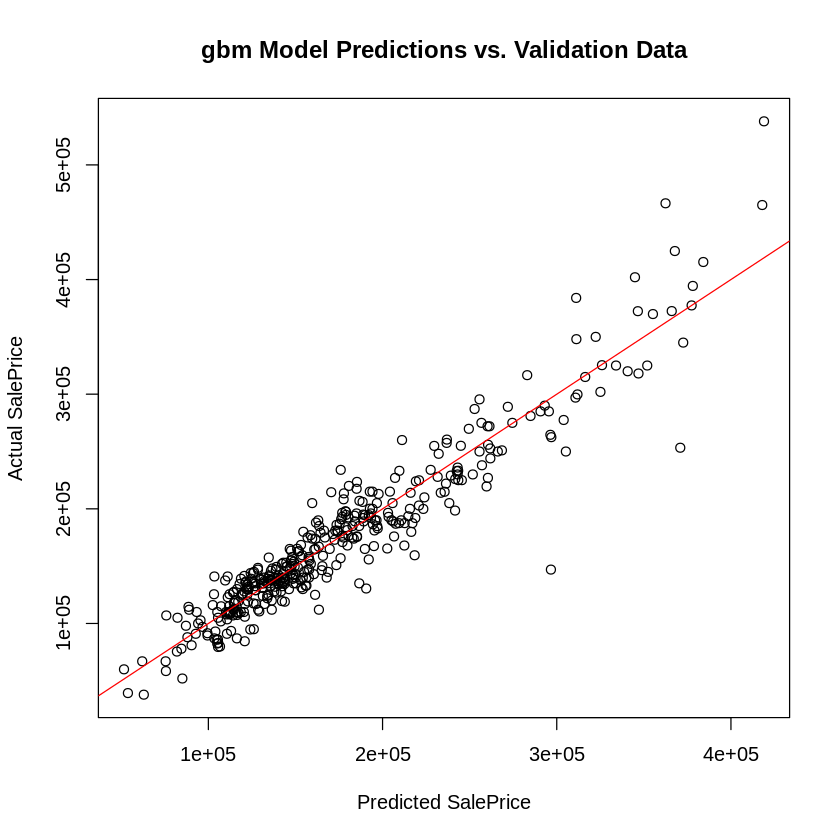

In [ ]:
plot(pred.gbm, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                    main = "gbm Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# viii. Xgboost

**Fit the Model on train data**

In [ ]:
# Define the tuning parameter grid
tune_grid <- expand.grid(
  nrounds = 100,
  max_depth = c(3, 5, 7),
  eta = c(0.01, 0.05, 0.1),
  gamma = 0,
  colsample_bytree = seq(0.5, 0.9, 0.1),
  min_child_weight = c(1, 3, 5),
  subsample = seq(0.5, 0.9, 0.1)
)

In [ ]:
# Train the XGBoost model using caret
xgb_model <- train(
  x = as.matrix(train[, -ncol(train)]),
  y = train$SalePrice,
  method = "xgbTree",
  trControl = trainControl(method = "cv", number = 5),
  tuneGrid = tune_grid,
  metric = "RMSE"
)

**Prediction on validation** 

In [ ]:
# Make predictions on the test set
pred.xgb <- predict(xgb_model, newdata = validation)

In [ ]:
xgb_actuals_preds <- data.frame(cbind(actuals=validation$SalePrice, predicteds = pred.xgb))
head(xgb_actuals_preds)

,actuals,predicteds
,<dbl>,<dbl>
1,181500,174875.9
2,140000,159240.7
3,250000,322155.8
4,129900,136844.8
5,345000,344764.5
6,149000,149412.3


**Performance metrics**

In [ ]:
# Calculate the RMSE
rmse_xgb <- sqrt(mean((pred.xgb - validation$SalePrice)^2))
print(rmse_xgb)

[1] 23924.02


In [ ]:
# Accuracy 
accuracy_xgb <- cor(pred.xgb, validation$SalePrice)^2
print(paste("Accuracy on test set:", round(accuracy_xgb * 100, 2), "%"))

[1] "Accuracy on test set: 88.8 %"


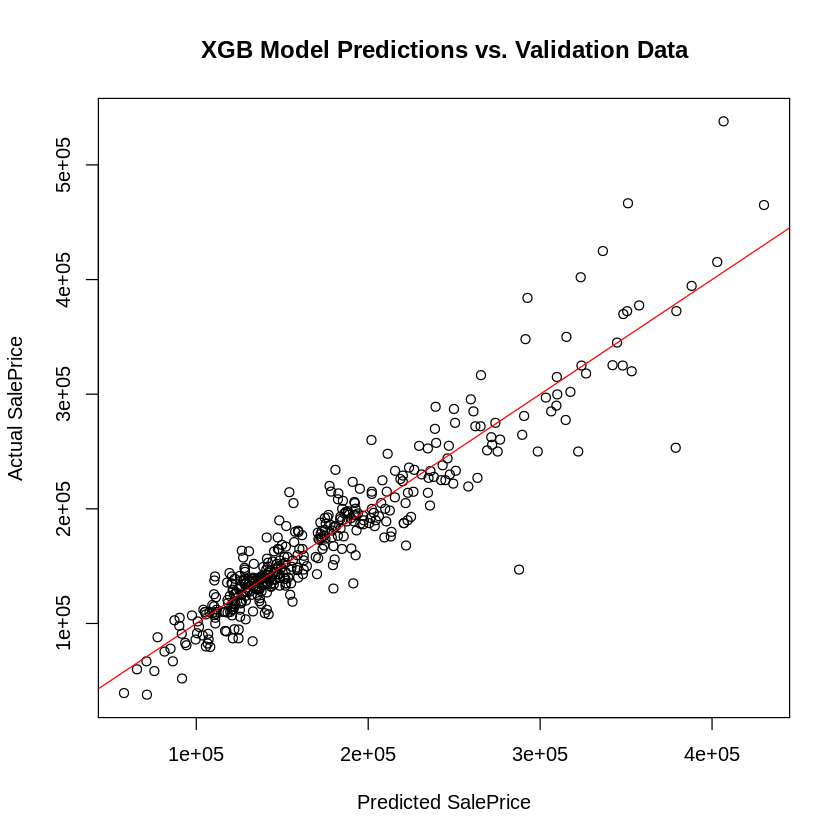

In [ ]:
plot(pred.xgb, validation$SalePrice, xlab = "Predicted SalePrice", ylab = "Actual SalePrice",
                                    main = "XGB Model Predictions vs. Validation Data")
abline(0, 1, col = "red")

# 8. Model Analysis and best model selection

In [ ]:
# Create a data frame with the model names and RMSE values
rmse_df <- data.frame(Model = c("fit.lm", "fit.elnet", "fit.lasso", "fit.ridge", "pred.dectree", "fit.rf","pred.gbm", "pred.xgb"),
                      RMSE = c(rmse_lm, rmse_elnet, rmse_lasso, rmse_ridge, rmse_dectree, rmse_rf, rmse_gbm, rmse_xgb ))

# Print the data frame
print(rmse_df)

         Model     RMSE
1       fit.lm 24053.13
2    fit.elnet 23780.52
3    fit.lasso 24056.04
4    fit.ridge 24056.22
5 pred.dectree 39350.39
6       fit.rf 25450.65
7     pred.gbm 22594.26
8     pred.xgb 23924.02


In [ ]:
# Create a data frame with the model names and accuracy values
accuracy_df <- data.frame(Model = c("fit.lm", "fit.elnet", "fit.lasso", "fit.ridge", "pred.dectree", "fit.rf", "pred.gbm", "pred.xgb"),
                          Accuracy = c(accuracy_lm[2,1], accuracy_elnet[2,1], accuracy_lasso[2,1], accuracy_ridge[2,1],
                           accuracy_dectree, accuracy_rf, accuracy_gbm, accuracy_xgb))

# Print the data frame
print(accuracy_df)

         Model  Accuracy
1       fit.lm 0.8872146
2    fit.elnet 0.8889620
3    fit.lasso 0.8872022
4    fit.ridge 0.8872007
5 pred.dectree 0.6956004
6       fit.rf 0.8791804
7     pred.gbm 0.8998338
8     pred.xgb 0.8880353


# 9. Sale prices of housing on test dataset

**Lets perform same preprocessing steps on test data too**

In [ ]:
## now lets read the test data
test_data = read.csv('/content/sample_data/housing_test.csv')
dim(test_data)

[1] 1459   80

In [ ]:
head(test_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,⋯,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
2,1462,20,RL,81,14267,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
3,1463,60,RL,74,13830,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
4,1464,60,RL,78,9978,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal
5,1465,120,RL,43,5005,Pave,NA,IR1,HLS,AllPub,⋯,144,0,NA,NA,NA,0,1,2010,WD,Normal
6,1466,60,RL,75,10000,Pave,NA,IR1,Lvl,AllPub,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal


In [ ]:
#replace NA values of numerical column with mean of column and categorical column with mode of column
for (col in names(test_data)) {
  if (is.numeric(test_data[[col]])) {
    test_data[[col]] <- ifelse(is.na(test_data[[col]]), mean(test_data[[col]], na.rm = TRUE), test_data[[col]])
  } else {
    test_data[[col]] <- ifelse(is.na(test_data[[col]]), mode(test_data[[col]]), test_data[[col]])
  }
}

In [ ]:
# Check for null values column-wise
new_nulls = colSums(is.na(test_data))
print(new_nulls)
test_data <- as.data.frame(test_data)
dim(test_data)

           Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0             0             0 
       Street         Alley      LotShape   LandContour     Utilities 
            0             0             0             0             0 
    LotConfig     LandSlope  Neighborhood    Condition1    Condition2 
            0             0             0             0             0 
     BldgType    HouseStyle   OverallQual   OverallCond     YearBuilt 
            0             0             0             0             0 
 YearRemodAdd     RoofStyle      RoofMatl   Exterior1st   Exterior2nd 
            0             0             0             0             0 
   MasVnrType    MasVnrArea     ExterQual     ExterCond    Foundation 
            0             0             0             0             0 
     BsmtQual      BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1 
            0             0             0             0             0 
 BsmtF

[1] 1459   80

In [ ]:
# Check for duplicates
duplicated_rows <- duplicated(test_data)

# Count the number of duplicates
sum(duplicated_rows)

[1] 0

In [ ]:
selected_cols <- c('Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition')
test_data <- test_data[selected_cols]
dim(test_data)

[1] 1459   74

In [ ]:
# Select the numerical columns in the dataset
num_cols <- sapply(test_data, is.numeric)
num_df <- test_data[, num_cols]
dim(num_df)

[1] 1459   36

In [ ]:
# Define a threshold for outlier detection (e.g., 3 standard deviations from the mean)
outlier_threshold <- 4.5

# Identify outlier rows in numerical columns

z_scores <- apply(num_df, 2, function(x) abs(scale(x, center = TRUE, scale = TRUE)))
outlier_rows_num <- apply(z_scores, 1, function(x) any(x > outlier_threshold))



In [ ]:
# Identify outlier rows in categorical columns
cat_cols <- sapply(test_data, is.factor)
cat_df <- test_data[, cat_cols]
outlier_rows_cat <- apply(cat_df, 1, function(x) any(x == ""))

In [ ]:
# Combine outlier rows from both numerical and categorical columns
outlier_rows <- outlier_rows_num | outlier_rows_cat

# Print the number of detected outliers for each column type
cat("Number of outliers detected:\n")
cat(sprintf("Total: %d\n", sum(outlier_rows)))

Number of outliers detected:
Total: 160


In [ ]:
# Remove the outlier rows from the dataset
test_data_clean <- test_data[!outlier_rows,]

dim(test_data_clean)

[1] 1299   74

In [ ]:
# remove same correlated variables as thst from train data
test_data <- test_data_clean[ , !(colnames(test_data_clean) %in% c('Exterior1st','GarageArea','GrLivArea','Exterior2nd','TotRmsAbvGrd','GarageCars','GarageCond','GarageQual'))]
dim(test_data)

[1] 1299   66

In [ ]:
# Remove the ID column
test_data_new <- test_data[, !(colnames(test_data) == "Id")]
head(test_data_new)


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,⋯,0,0,0,120,0,0,6,2010,WD,Normal
3,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,⋯,34,0,0,0,0,0,3,2010,WD,Normal
4,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,⋯,36,0,0,0,0,0,6,2010,WD,Normal
5,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,⋯,82,0,0,144,0,0,1,2010,WD,Normal
6,60,RL,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,⋯,84,0,0,0,0,0,4,2010,WD,Normal
7,20,RL,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,⋯,21,0,0,0,0,500,3,2010,WD,Normal


[1] 1299   65

In [ ]:
test_data <- data.frame(test_data_new)
dim(test_data)

[1] 1299   65

In [ ]:
## choose the final model and insert below - 

In [ ]:
# Predict using the gbm model:
test_prediction_final_model <- predict(gbm_model, newdata = test_data)
#test_prediction_final_model

# create a csv and save the results
write.csv(data.frame(test_prediction_final_model), "housing_test_results.csv", row.names = FALSE)


Warning message in predict.gbm(modelFit, newdata, type = "response", n.trees = modelFit$tuneValue$n.trees):
“NAs introduced by coercion”


In [ ]:
# Read the CSV file into a data frame
housing_test_results <- read.csv("housing_test_results.csv")

# View the first few rows of the data frame
head(housing_test_results)


,test_prediction_final_model
,<dbl>
1,137160.6
2,172489.4
3,176138.7
4,198539.1
5,184465.6
6,174784.6
